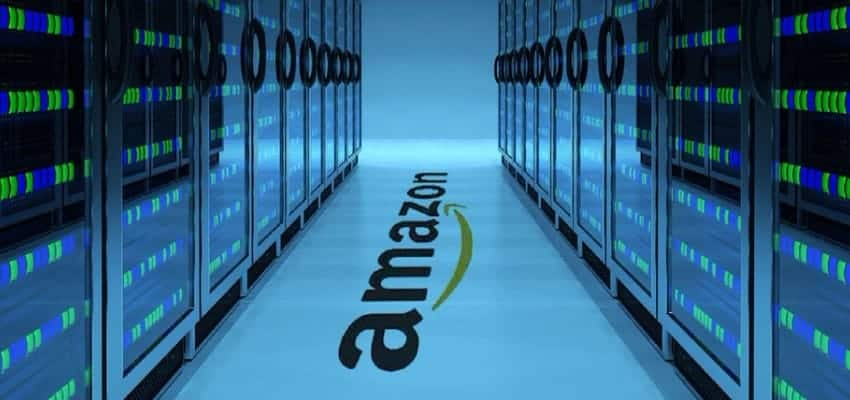

# Data Description:
    Amazon Reviews data ( data source ) The repository has severaldatasets. For this case study, we are using the Electronics dataset.
    
# Domain:
    E-commerce

# Context:
    Online E-commerce websites like Amazon, Flipkart uses different recommendation models to provide different suggestions to different users. Amazon currently uses item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

# Attribute Information:
    ● userId : Every user identified with a unique id
    ● productId : Every product identified with a unique id
    ● Rating : Rating of the corresponding product by    the corresponding user
    ● timestamp : Time of the rating ( ignore this column for this exercise)

# Learning Outcomes:
    ● Exploratory Data Analysis
    ● Creating a Recommendation system using real data
    ● Collaborative filtering

# Objective:
    Build a recommendation system to recommend products to customers based on the their previous ratings for other     products.
    
# Steps and tasks:
    1. Read and explore the given dataset. (Rename column/add headers, plot histograms, find data characteristics) - (2.5 Marks)
    2. Take a subset of the dataset to make it less sparse/ denser.
    ( For example, keep the users only who has given 50 or more number of ratings ) - (2.5 Marks)
    3. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio) - (2.5 Marks)
    4. Build Popularity Recommender model. - (20 Marks)
    5. Build Collaborative Filtering model. - (20 Marks)
    6. Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error
    (RMSE) on predictions made on the test data.) - (7.5 Marks)
    7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products for each user based on his/her
    habits, we will recommend 5 new products. - (7.5 Marks)
    8. Summarise your insights. - (7.5 marks)
    

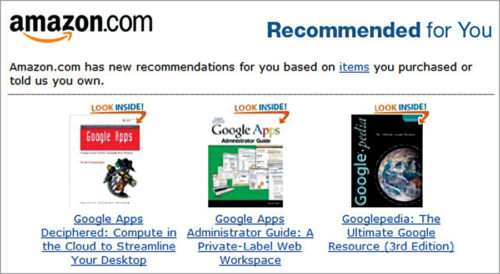

# Amazon Rating based Recommender system. Here are the step by step workflow:

    1> Load data
    2> perform EDA
            a> Check for sparsity
            b> Check for null values
            c> Check rating attribute mean,std,count, quartile and distribution.
            d> Check Users trend on rating
            e> Check rating trend of products
    3> Take subset of dataset. decision factor : To take only users who has given 50 or more ratings.
    4> Check the EDA of the new dataset.
    5> Split the data randomly into train and test dataset using 70:30 ratio.
    6> Build Popularity Based Models. Following 4 popularity based model are developed:
            a> Highest Mean rating based
            b> Highest count of rating based
            c> Weighted Average rating based.
            d> Damp rating based.
    7> Review and compare all the above popularity based models.
    Collaborative Filtering model
    8> Develop Model Using SVD - Matrix Factorization
    9> Build Models Using Surprise Package:
    Important Note: Due to Computation limitation and Memory limitation. We have to further reduce the dataset.
    Option 1: First 50000 records.
    Option 2: Take data of products which has atleast 5 ratings. 

    Option 1 was of no useful.again Memory error was reported.
    Option 2 was executing successfully. Hence further model building shall be using option 2 dataset.

    10> Build item-item based KNN model
    11> Build user-user based KNN model
    12> Review the Accuracy metrics of the 2 models.
    13> Check the best and worst predictions of the 2 models
    14> Compare both the models.

    15> Suprise package has multiple algorithms. Let's build model using all the below algorithms:
    The prediction_algorithms package includes the following prediction algorithms:

        a> random_pred.NormalPredictor    Algorithm predicting a random rating based on the distribution of the training set, which is assumed to be normal.
        b> baseline_only.BaselineOnly    Algorithm predicting the baseline estimate for given user and item.
        c> knns.KNNBasic    A basic collaborative filtering algorithm.
        d> knns.KNNWithMeans    A basic collaborative filtering algorithm, taking into account the mean ratings of each user.
        e> knns.KNNWithZScore    A basic collaborative filtering algorithm, taking into account
        f> knns.KNNBaseline    A basic collaborative filtering algorithm taking into account a baseline rating.
        g> matrix_factorization.SVD    The famous SVD algorithm, as popularized by Simon Funk during the Netflix Prize.When baselines are not used, this is equivalent to Probabilistic Matrix Factorization. 
        h> matrix_factorization.SVDpp    The SVD++ algorithm, an extension of SVD taking into account implicit ratings.
        i> matrix_factorization.NMF    A collaborative filtering algorithm based on Non-negative Matrix Factorization.
        j> slope_one.SlopeOne    A simple yet accurate collaborative filtering algorithm.
        k> co_clustering.CoClustering    A collaborative filtering algorithm based on co-clustering.

    16> Choose the top 2 algorithm model by using RMSE Accuracy metrics
    17> Fine tune hyper-parameter of them
    10> Build models using the fine tuned estimators.
    11> Review the Accuracy metrics of the 2 models.
    13> Check the best and worst predictions of the 2 models
    14> Compare both the models.
    15> Get top=k recommendations by both models.
    16> Compute classification Accuracy metrics of both models.
        a> Precision or true positive accuracy (Confidence)
        b>Recall or true positive rate (sensitivity)
        c> Fallout or false positive rate
        d>Miss rate or false negative rate
        e> Inverse precision or true negative accuracy
        f>Inverse recall or true negative rate (also called specificity)
        g>The F1-measure
        h>Markedness
        i>Informedness
        j> The Matthews Correlation
        K>AP@k
        l>MAP@k

In [1]:
#import the reqired libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
def percentage_disp(ax,total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    return

def countplot_display(dataset,column):
    ax = sns.countplot(y=column, data=dataset)
    plt.title('Distribution amoung'+ column)
    plt.xlabel('count')
    total = len(dataset[column])
    percentage_disp(ax,total)
    plt.show() 
    return

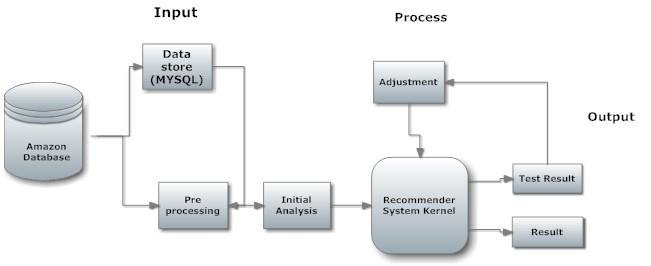

# Read and Explore Data

In [3]:
amazonrating_data_orig = pd.read_csv('ratings_Electronics.csv',header=None,names=['userid','productid','ratings','time'])  

In [4]:
amazonrating_data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userid       object
productid    object
ratings      float64
time         int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


# Dataset contains 4 attributes, Userid, productid, ratings and time.
For this project, time attribute is not used.

In [5]:
# dropping time attribute.
amazonrating_data_orig.drop('time',1,inplace=True)

# Let's check the Sparsity of the dataset.

In [6]:
users = amazonrating_data_orig['userid'].nunique()
items = amazonrating_data_orig['productid'].nunique()
ratings = amazonrating_data_orig['ratings'].count()
print("****************************")
print("Total Number of users:",users)
print("Total Number of products:",items)
print("Total Number of ratings:",ratings)
sparsity = ratings/(items*users)
print("sparsity",sparsity)

****************************
Total Number of users: 4201696
Total Number of products: 476002
Total Number of ratings: 7824482
sparsity 3.912210290338533e-06


# Dataset has only ratings attribute as numeric.
Let's check the count, mean, std, min, quaterile and max

In [7]:
amazonrating_data_orig.describe()

,ratings
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


# Check for the null values fields.

In [8]:
amazonrating_data_orig.isnull().sum()

userid       0
productid    0
ratings      0
dtype: int64

In [9]:
overall_rating = amazonrating_data_orig.groupby('ratings').size().reset_index(name='count')
overall_rating

,ratings,count
0,1.0,901765
1,2.0,456322
2,3.0,633073
3,4.0,1485781
4,5.0,4347541


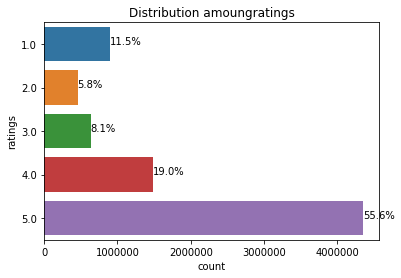

In [10]:
countplot_display(amazonrating_data_orig,'ratings')

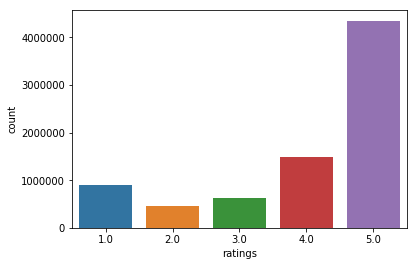

In [11]:
sns.barplot(overall_rating['ratings'],overall_rating['count'])

# This data set has huge high rating count. 55.6% of ratings are 5 rating.
# If we considered 2 categories low rating(1&2) and high rating(3 to5). Then 83% of the rating comes under high rating. rest 17% is the low rating.

In [12]:
amazonrating_groupby_user = amazonrating_data_orig.groupby('userid').ratings.agg(['count','mean','min','max']).sort_values('count',ascending=False)
amazonrating_groupby_user.head()

,count,mean,min,max
userid,,,,
A5JLAU2ARJ0BO,520,3.861538,1.0,5.0
ADLVFFE4VBT8,501,4.283433,1.0,5.0
A3OXHLG6DIBRW8,498,4.451807,1.0,5.0
A6FIAB28IS79,431,4.183295,1.0,5.0
A680RUE1FDO8B,406,4.406404,1.0,5.0


In [13]:
singlerated_userscount = amazonrating_groupby_user[amazonrating_groupby_user['count'] == 1].count()['count']
print("********************")
print("No of Users rated only one product is: ",singlerated_userscount )
print("Percentage of users rated only one product is %f%% "%((singlerated_userscount/amazonrating_data_orig['userid'].nunique())*100) )

********************
No of Users rated only one product is:  2881832
Percentage of users rated only one product is 68.587351% 


# 68.58% of users have rated only once.

In [14]:
amazonrating_groupby_product = amazonrating_data_orig.groupby('productid').ratings.agg(['count','mean','min','max']).sort_values('count',ascending=False)
amazonrating_groupby_product.head()

,count,mean,min,max
productid,,,,
B0074BW614,18244,4.491504,1.0,5.0
B00DR0PDNE,16454,3.931020,1.0,5.0
B007WTAJTO,14172,4.424005,1.0,5.0
B0019EHU8G,12285,4.754497,1.0,5.0
B006GWO5WK,12226,4.314657,1.0,5.0


In [15]:
singlerated_product = amazonrating_groupby_product[amazonrating_groupby_product['count'] == 1].count()['count']
print("********************")
print("Total number of products:",amazonrating_data_orig['productid'].nunique())
print("No of products rated only one product is: ",singlerated_product )
print("Percentage of products rated only one product is %f%% "%((singlerated_product/amazonrating_data_orig['productid'].nunique())*100) )

********************
Total number of products: 476002
No of products rated only one product is:  179738
Percentage of products rated only one product is 37.759925% 


# 37.75% of products are rated only once.

# Let's make the dataset less sparse/dense

We suggested shall have only users given 50 or more ratings.

In [16]:
amazonrating_data_50 = amazonrating_data_orig.groupby('userid').filter(lambda x:len(x)>50)

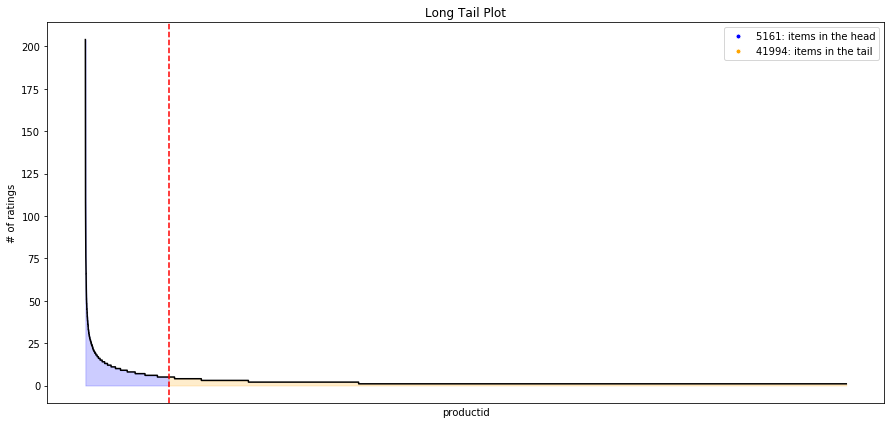

In [18]:
import recmetrics
fig = plt.figure(figsize=(15, 7))
recmetrics.long_tail_plot(df=amazonrating_data_50, 
             item_id_column="productid", 
             interaction_type="ratings", 
             percentage=0.5,
             x_labels=False)

In [19]:
users = amazonrating_data_50['userid'].nunique()
items = amazonrating_data_50['productid'].nunique()
ratings = amazonrating_data_50['ratings'].count()
print("****************************")
print("Total Number of users:",users)
print("Total Number of products:",items)
print("Total Number of ratings:",ratings)
sparsity = ratings/(items*users)
print("sparsity",sparsity)

****************************
Total Number of users: 1466
Total Number of products: 47155
Total Number of ratings: 122171
sparsity 0.001767284258771579


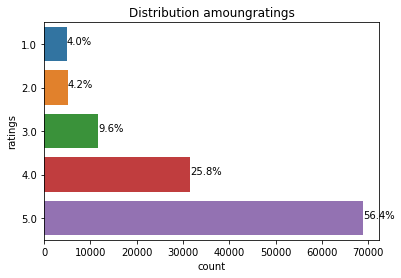

In [20]:
countplot_display(amazonrating_data_50,'ratings')

In [21]:
amazonrating_groupby_product_50 = amazonrating_data_50.groupby('productid').ratings.agg(['count','mean','min','max']).sort_values('count',ascending=False)
amazonrating_groupby_product_50.head()

,count,mean,min,max
productid,,,,
B0088CJT4U,204,4.215686,1.0,5.0
B003ES5ZUU,177,4.858757,2.0,5.0
B000N99BBC,163,4.773006,3.0,5.0
B007WTAJTO,156,4.692308,1.0,5.0
B00829TIEK,146,4.431507,1.0,5.0


In [22]:
singlerated_product_50 = amazonrating_groupby_product_50[amazonrating_groupby_product_50['count'] == 1].count()['count']
print("********************")
print("Total number of products:",amazonrating_data_orig['productid'].nunique())
print("No of products rated only one product is: ",singlerated_product_50 )
print("Percentage of products rated only one product is %f%% "%((singlerated_product_50/amazonrating_data_orig['productid'].nunique())*100) )

********************
Total number of products: 476002
No of products rated only one product is:  30224
Percentage of products rated only one product is 6.349553% 


# In the amazonrating data more than 50 ratings, it's reduced from 37.75% to 6.34% of products rated only once.

In [23]:
amazonrating_data = amazonrating_data_50.copy(deep=True)

# Spliting data randomnly into train and test datasets into 70:30 ratio

In [24]:
#Split the data randomnly into train and test datasets into 70:30 ratio
train_data, test_data = train_test_split(amazonrating_data, test_size = 0.3, random_state=23)
train_data.head()

,userid,productid,ratings
1442182,A1NGFGBX2VCQS8,B000VIQ6AO,1.0
3901876,AEAFHD09X8044,B00463C44W,5.0
447657,A8X8D4BUY5DFU,B0002BEPH6,3.0
5862471,ALQ4USPEQ9L5N,B007Q8GOHM,4.0
7385267,A1VQBEW0G4IH1J,B00DDQ4AZY,4.0


# Popularity Based Recommender System
Popularity based recommender System is a non-personalized recommendation system. It's very simple recommendation system. this recommender system provides with general recommendations to the user without any context of what user wants or what is his preference. When we visit Amazon website, It provides us with the list the most popular items. The system calculates the mean of the product rating of all the users and provides us with the products with maximum mean.

In [25]:
## Count of rating provided by user for each unique product 
train_mean_rating = train_data.groupby('productid').agg({'userid': 'count','ratings':'mean'}).reset_index()
train_mean_rating.rename(columns = {'userid': 'count','ratings':'mean_rating'},inplace=True)
train_mean_rating.head(5)

,productid,count,mean_rating
0,0594481813,1,3.0
1,0970407998,1,4.0
2,0972683275,2,5.0
3,1400501466,1,1.0
4,1400501520,1,5.0


In [26]:
#Sort the products based on the rating count
train_mean_rating = train_mean_rating.sort_values(['mean_rating', 'productid'], ascending = [0,1]) 
      
#Rank based on rating count
train_mean_rating['mean_rank'] = train_mean_rating['mean_rating'].rank(ascending=0, method='first') 
          
#top 5 recommendations 
train_mean_rating.head(5) 

,productid,count,mean_rating,mean_rank
2,0972683275,2,5.0,1.0
4,1400501520,1,5.0,2.0
10,1400699169,1,5.0,3.0
11,787988002X,1,5.0,4.0
14,9573212919,1,5.0,5.0


# Popularity Recommender System: Method 1 - Highest Mean rating based.

In [27]:
def highest_mean_rating_popularity_recommendation(top_items_count,userid):
    print(" The Top %d Recommendation for userid %s" %(top_items_count,userid))
    recommendations = train_mean_rating.sort_values('mean_rank',ascending=True).head(top_items_count)
    recommendations['userid'] = userid
     #Bring user_id column to the front 
    cols = recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    recommendations = recommendations[cols] 
    print(recommendations)
    return
for test_users in range(0,5):
    highest_mean_rating_popularity_recommendation(5,test_data.iloc[test_users]['userid'])

 The Top 5 Recommendation for userid A2WLNSZ9U0T1S3
            userid   productid  count  mean_rating  mean_rank
2   A2WLNSZ9U0T1S3  0972683275      2          5.0        1.0
4   A2WLNSZ9U0T1S3  1400501520      1          5.0        2.0
10  A2WLNSZ9U0T1S3  1400699169      1          5.0        3.0
11  A2WLNSZ9U0T1S3  787988002X      1          5.0        4.0
14  A2WLNSZ9U0T1S3  9573212919      1          5.0        5.0
 The Top 5 Recommendation for userid AO2EURP2Y4JZM
           userid   productid  count  mean_rating  mean_rank
2   AO2EURP2Y4JZM  0972683275      2          5.0        1.0
4   AO2EURP2Y4JZM  1400501520      1          5.0        2.0
10  AO2EURP2Y4JZM  1400699169      1          5.0        3.0
11  AO2EURP2Y4JZM  787988002X      1          5.0        4.0
14  AO2EURP2Y4JZM  9573212919      1          5.0        5.0
 The Top 5 Recommendation for userid A1ZXMMQPYC3Z9I
            userid   productid  count  mean_rating  mean_rank
2   A1ZXMMQPYC3Z9I  0972683275      2        

# In Mean based popularity problem is, even if one user rating is high, it shall be considered as hightest mean rating. 

<Figure size 576x432 with 0 Axes>

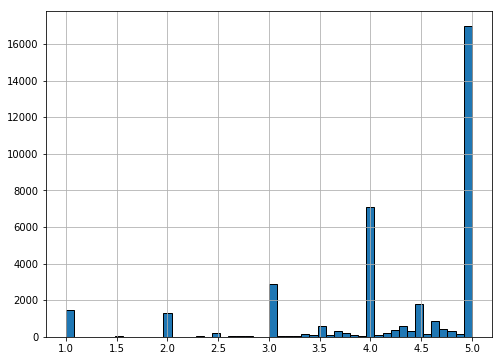

In [28]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
train_mean_rating['mean_rating'].hist(bins=50)

# Advantages and Disadvantages of Popularity based Recommender System
The advantage of this method is that it is easy to implement as only the popular or the highly rated items are displayed to the
users. Secondly the data for these recommender systems is easy to collect.
the recommendations in this system are the same to all users and lack personalization and hence might not appeal to everyone. Also these systems face challenges in clustered diverse population.

# Popularity Recommender System: Method 2 - Highest count of rating based.

Let's find the most rated product and recommend highest rated products.

In [29]:
#Count of rating provided by user for each unique product 
train_rating_count = train_data.groupby('productid').agg({'userid': 'count','ratings':'mean'}).reset_index()
train_rating_count.rename(columns = {'userid': 'count','ratings':'mean_rating'},inplace=True)
train_rating_count.head(5)

,productid,count,mean_rating
0,0594481813,1,3.0
1,0970407998,1,4.0
2,0972683275,2,5.0
3,1400501466,1,1.0
4,1400501520,1,5.0


In [30]:
#Sort the products based on the rating count
train_rating_count = train_rating_count.sort_values(['count', 'productid'], ascending = [0,1]) 
      
#Rank based on rating count
train_rating_count['count_rank'] = train_rating_count['count'].rank(ascending=0, method='first') 
          
#top 5 recommendations 
train_rating_count.head(5) 


,productid,count,mean_rating,count_rank
30049,B0088CJT4U,141,4.255319,1.0
19069,B003ES5ZUU,127,4.850394,2.0
8410,B000N99BBC,114,4.807018,3.0
29480,B007WTAJTO,111,4.702703,4.0
29759,B00829TIEK,111,4.423423,5.0


In [31]:
def highest_rated_popularity_recommendation(top_items_count,userid):
    print(" The Top %d Recommendation for userid %s" %(top_items_count,userid))
    
    recommendations = train_rating_count.sort_values('count_rank',ascending=True).head(top_items_count)
    
    recommendations['userid'] = userid
     #Bring user_id column to the front 
    cols = recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    recommendations = recommendations[cols] 
    print(recommendations)
    
    return
for test_users in range(0,5):
    highest_rated_popularity_recommendation(5,test_data.iloc[test_users]['userid'])

 The Top 5 Recommendation for userid A2WLNSZ9U0T1S3
               userid   productid  count  mean_rating  count_rank
30049  A2WLNSZ9U0T1S3  B0088CJT4U    141     4.255319         1.0
19069  A2WLNSZ9U0T1S3  B003ES5ZUU    127     4.850394         2.0
8410   A2WLNSZ9U0T1S3  B000N99BBC    114     4.807018         3.0
29480  A2WLNSZ9U0T1S3  B007WTAJTO    111     4.702703         4.0
29759  A2WLNSZ9U0T1S3  B00829TIEK    111     4.423423         5.0
 The Top 5 Recommendation for userid AO2EURP2Y4JZM
              userid   productid  count  mean_rating  count_rank
30049  AO2EURP2Y4JZM  B0088CJT4U    141     4.255319         1.0
19069  AO2EURP2Y4JZM  B003ES5ZUU    127     4.850394         2.0
8410   AO2EURP2Y4JZM  B000N99BBC    114     4.807018         3.0
29480  AO2EURP2Y4JZM  B007WTAJTO    111     4.702703         4.0
29759  AO2EURP2Y4JZM  B00829TIEK    111     4.423423         5.0
 The Top 5 Recommendation for userid A1ZXMMQPYC3Z9I
               userid   productid  count  mean_rating  coun

<Figure size 576x432 with 0 Axes>

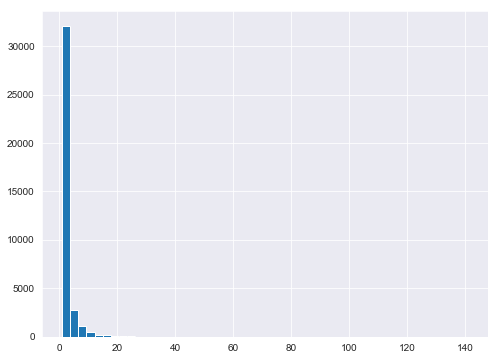

In [32]:
sns.set_style('dark')
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
train_rating_count['count'].hist(bins=50)

Most of the products are rated less than 10 rating.

<Figure size 576x432 with 0 Axes>

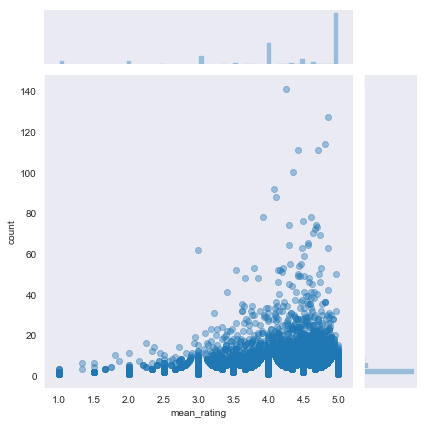

In [33]:
gg = plt.figure(figsize=(8,6))
gg= plt.rcParams['patch.force_edgecolor'] = True
gg = sns.jointplot(x='mean_rating', y='count', data=train_rating_count, alpha=0.4)

# User's seems to be liberal in rating. We can see usual trend is high rating.

<Figure size 1152x432 with 0 Axes>

Text(0.5, 1.0, '"Most Popular" Products by rating count')

Text(0.5, 0, 'Rating count')

Text(0, 0.5, 'Product ID')

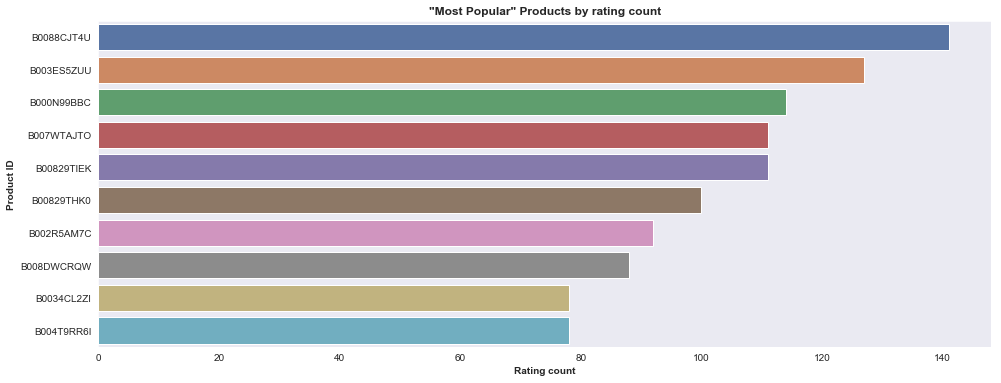

In [34]:
plt.figure(figsize=(16,6))

ax = sns.barplot(x=train_rating_count['count'].head(10), y=train_rating_count['productid'].head(10), data=train_rating_count, palette='deep')

plt.title('"Most Popular" Products by rating count', weight='bold')
plt.xlabel('Rating count', weight='bold')
plt.ylabel('Product ID', weight='bold')
plt.show()

# Popularity Recommender System: Method 3 - Weighted Average rating based.

# Weighted Average Rating

This formula is employed to prevent extreme votes from skewing the data and providing an inaccurate result.
Source: http://trailerpark.weebly.com/imdb-rating.html

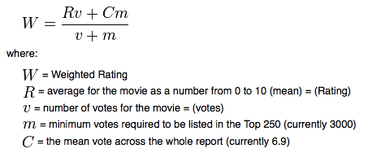

In [35]:
#Count of rating provided by user for each unique product 
train_weighted_average_rating = train_data.groupby('productid').agg({'userid': 'count','ratings':'mean'}).reset_index()
train_weighted_average_rating.rename(columns = {'userid': 'count','ratings':'mean_rating'},inplace=True)
V = train_weighted_average_rating['count']
R = train_weighted_average_rating['mean_rating']
C = train_weighted_average_rating['mean_rating'].mean()
m = 10

train_weighted_average_rating['weighted_average'] = ((R*V)+(C*m))/(V+m)
train_weighted_average_rating.head()

,productid,count,mean_rating,weighted_average
0,0594481813,1,3.0,4.117006
1,0970407998,1,4.0,4.207915
2,0972683275,2,5.0,4.357255
3,1400501466,1,1.0,3.935188
4,1400501520,1,5.0,4.298824


In [36]:
train_weighted_average_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37200 entries, 0 to 37199
Data columns (total 4 columns):
productid           37200 non-null object
count               37200 non-null int64
mean_rating         37200 non-null float64
weighted_average    37200 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ MB


In [37]:
#Sort the products based on the rating count
train_weighted_average_rating = train_weighted_average_rating.sort_values(['weighted_average', 'productid'], ascending = [0,1]) 
      
#Rank based on rating count
train_weighted_average_rating['Weigh_avg_rank'] = train_weighted_average_rating['weighted_average'].rank(ascending=0, method='first') 
          
#top 5 recommendations 
train_weighted_average_rating.head(5) 

,productid,count,mean_rating,weighted_average,Weigh_avg_rank
14446,B001TH7GUU,50,4.960000,4.838118,1.0
19069,B003ES5ZUU,127,4.850394,4.805015,2.0
24720,B0052SCU8U,32,4.968750,4.792549,3.0
11864,B0019EHU8G,63,4.857143,4.771056,4.0
8410,B000N99BBC,114,4.807018,4.760380,5.0


In [38]:
def Weighted_Average_popularity_recommendation(top_items_count,userid):
    print(" The Top %d Recommendation for userid %s" %(top_items_count,userid))
    recommendations = train_weighted_average_rating.drop('Weigh_avg_rank',1,inplace=False).sort_values('weighted_average',ascending=False).head(top_items_count)
    recommendations['userid'] = userid
     #Bring user_id column to the front 
    cols = recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    recommendations = recommendations[cols] 
    print(recommendations)
    
    return
for test_users in range(0,5):
    Weighted_Average_popularity_recommendation(5,test_data.iloc[test_users]['userid'])

 The Top 5 Recommendation for userid A2WLNSZ9U0T1S3
               userid   productid  count  mean_rating  weighted_average
14446  A2WLNSZ9U0T1S3  B001TH7GUU     50     4.960000          4.838118
19069  A2WLNSZ9U0T1S3  B003ES5ZUU    127     4.850394          4.805015
24720  A2WLNSZ9U0T1S3  B0052SCU8U     32     4.968750          4.792549
11864  A2WLNSZ9U0T1S3  B0019EHU8G     63     4.857143          4.771056
8410   A2WLNSZ9U0T1S3  B000N99BBC    114     4.807018          4.760380
 The Top 5 Recommendation for userid AO2EURP2Y4JZM
              userid   productid  count  mean_rating  weighted_average
14446  AO2EURP2Y4JZM  B001TH7GUU     50     4.960000          4.838118
19069  AO2EURP2Y4JZM  B003ES5ZUU    127     4.850394          4.805015
24720  AO2EURP2Y4JZM  B0052SCU8U     32     4.968750          4.792549
11864  AO2EURP2Y4JZM  B0019EHU8G     63     4.857143          4.771056
8410   AO2EURP2Y4JZM  B000N99BBC    114     4.807018          4.760380
 The Top 5 Recommendation for userid A1

<Figure size 576x432 with 0 Axes>

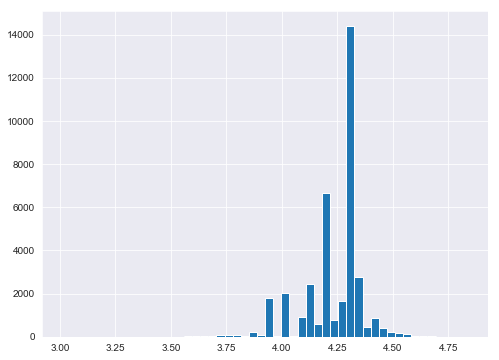

In [39]:
sns.set_style('dark')
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
train_weighted_average_rating['weighted_average'].hist(bins=50)

# Weighted Average rating, most of the rating are close to the mean rating. New products ratings shall face problem is getting to the top list.

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

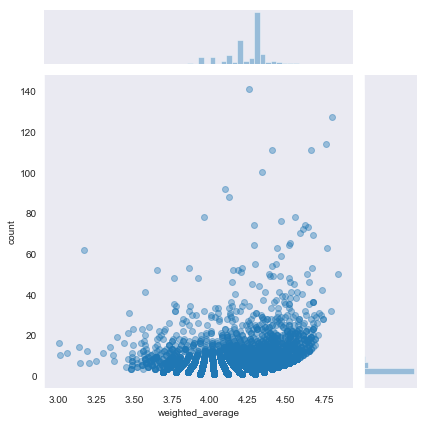

In [40]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='weighted_average', y='count', data=train_weighted_average_rating, alpha=0.4)

<Figure size 1152x432 with 0 Axes>

Text(0.5, 1.0, '"Most Popular" Products by Weighted Average Rating')

Text(0.5, 0, 'Rating count')

Text(0, 0.5, 'Product ID')

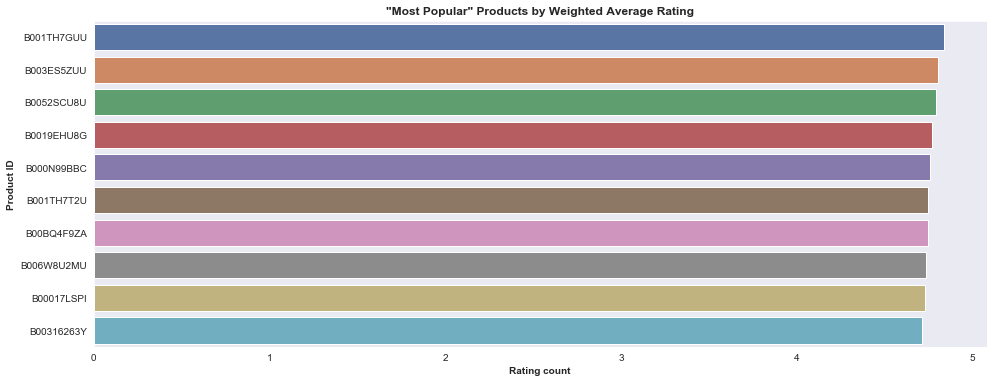

In [41]:
plt.figure(figsize=(16,6))

ax = sns.barplot(x=train_weighted_average_rating['weighted_average'].head(10), y=train_weighted_average_rating['productid'].head(10), data=train_weighted_average_rating, palette='deep')

plt.title('"Most Popular" Products by Weighted Average Rating', weight='bold')
plt.xlabel('Rating count', weight='bold')
plt.ylabel('Product ID', weight='bold')
plt.show()

In [42]:
train_mean_rating.head(5),train_rating_count.head(5),train_weighted_average_rating.head(5)

(     productid  count  mean_rating  mean_rank
 2   0972683275      2          5.0        1.0
 4   1400501520      1          5.0        2.0
 10  1400699169      1          5.0        3.0
 11  787988002X      1          5.0        4.0
 14  9573212919      1          5.0        5.0,
         productid  count  mean_rating  count_rank
 30049  B0088CJT4U    141     4.255319         1.0
 19069  B003ES5ZUU    127     4.850394         2.0
 8410   B000N99BBC    114     4.807018         3.0
 29480  B007WTAJTO    111     4.702703         4.0
 29759  B00829TIEK    111     4.423423         5.0,
         productid  count  mean_rating  weighted_average  Weigh_avg_rank
 14446  B001TH7GUU     50     4.960000          4.838118             1.0
 19069  B003ES5ZUU    127     4.850394          4.805015             2.0
 24720  B0052SCU8U     32     4.968750          4.792549             3.0
 11864  B0019EHU8G     63     4.857143          4.771056             4.0
 8410   B000N99BBC    114     4.807018       

a gray sheep is a user who has such an individual taste that even if there’s data, there are likely no other consumers—or very, very few people—who’ve bought any of the products the gray sheep has.

The reason it’s here among the cold-start problem is that gray sheep create the same issue of calculating recommendations for users that you don’t have any data on. And certain solutions overlap between cold visitors and gray sheep, so it’s worth mentioning here as well.

# Popularity Recommender System: Method 4 - damp rating based.

there is a problem in this approach of taking simple mean of the ratings. When there are very less number of ratings, we have a very less confidence of whether a good rating provided to an item is actually good or not. We do not want to be very much sanguine about an item being very good based on very few ratings. To overcome this challenge, we damp the overall mean. In this, we assume that without evidence, every item is average and every additional rating is the evidence if the given item is above average or below average. In simple language, it will not allow any item to have a very good rating on the basis of only few good ratings until sufficient number of good ratings is not provided.
To achieve this, we modify the formula of mean in the following way :

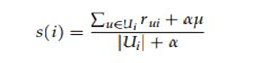

α : Strength of the evidence required to overcome the overall mean(Generally equals to 5 but can be changed as per business requirements)
µ : Global mean rating
What this K term will do is that when ther are very less number of ratings, it will damp some extreme positive ratings and as the number of rating increases, this damping effect will start decreasing and true mean will start coming into the picture.

In [43]:
damp_rating = train_data.groupby('productid').agg({'ratings':['count','sum','mean']}).reset_index().values
damp_rating = pd.DataFrame(damp_rating,columns = ['productid','count_rating','sum_rating','mean_rating'])
damp_rating['sum_rating_factor']=(damp_rating['sum_rating']+5*(damp_rating["mean_rating"].mean())).astype(float)
damp_rating['count_rating_factor']=(damp_rating['count_rating']+5).astype(float)
damp_rating['count_rating'] = damp_rating['count_rating'].astype(int)
damp_rating['damp_mean']=(damp_rating['sum_rating_factor']/damp_rating['count_rating_factor']).astype(float)

damp_rating_head = damp_rating.sort_values(['damp_mean'], ascending=False).head(10)

In [44]:
def dampmean_popularity_recommendation(top_items_count,userid):
    print(" The Top %d Recommendation for userid %s" %(top_items_count,userid))
    recommendations = damp_rating[['productid','count_rating','mean_rating','damp_mean']].sort_values(['damp_mean'], ascending=False).head(top_items_count)
    recommendations['userid'] = userid
     #Bring user_id column to the front 
    cols = recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    recommendations = recommendations[cols] 
    print(recommendations)
    return
for test_users in range(0,5):
    dampmean_popularity_recommendation(5,test_data.iloc[test_users]['userid'])

 The Top 5 Recommendation for userid A2WLNSZ9U0T1S3
               userid   productid  count_rating mean_rating  damp_mean
14446  A2WLNSZ9U0T1S3  B001TH7GUU            50        4.96   4.893519
24720  A2WLNSZ9U0T1S3  B0052SCU8U            32     4.96875   4.868744
19069  A2WLNSZ9U0T1S3  B003ES5ZUU           127     4.85039   4.826845
33605  A2WLNSZ9U0T1S3  B00BQ4F9ZA            28     4.92857   4.822531
14449  A2WLNSZ9U0T1S3  B001TH7T2U            28     4.92857   4.822531
 The Top 5 Recommendation for userid AO2EURP2Y4JZM
              userid   productid  count_rating mean_rating  damp_mean
14446  AO2EURP2Y4JZM  B001TH7GUU            50        4.96   4.893519
24720  AO2EURP2Y4JZM  B0052SCU8U            32     4.96875   4.868744
19069  AO2EURP2Y4JZM  B003ES5ZUU           127     4.85039   4.826845
33605  AO2EURP2Y4JZM  B00BQ4F9ZA            28     4.92857   4.822531
14449  AO2EURP2Y4JZM  B001TH7T2U            28     4.92857   4.822531
 The Top 5 Recommendation for userid A1ZXMMQPYC3Z9I

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

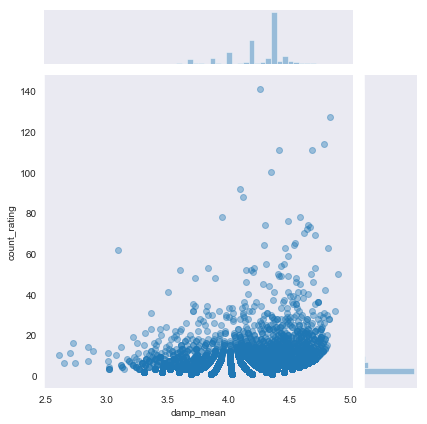

In [45]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='damp_mean', y='count_rating', data=damp_rating, alpha=0.4)

<Figure size 1152x432 with 0 Axes>

Text(0.5, 1.0, '"Most Popular" Products by Damp Rating')

Text(0.5, 0, 'Rating ')

Text(0, 0.5, 'Product ID')

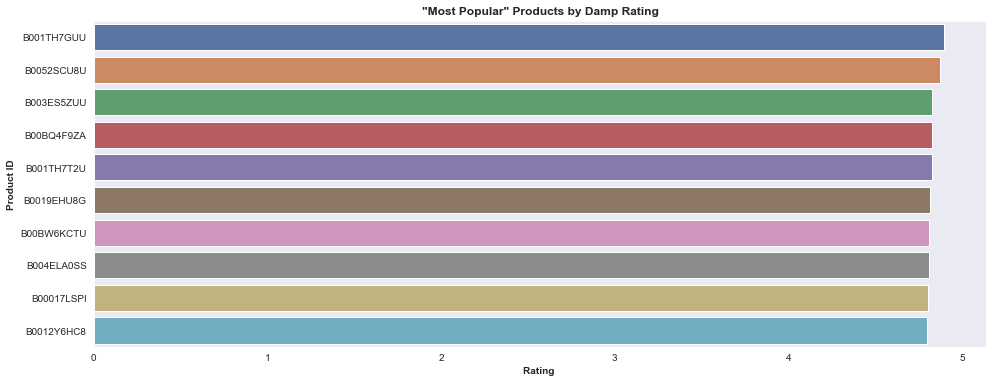

In [46]:
plt.figure(figsize=(16,6))

ax = sns.barplot(x=damp_rating_head['damp_mean'], y=damp_rating_head['productid'], data=damp_rating_head, palette='deep')

plt.title('"Most Popular" Products by Damp Rating', weight='bold')
plt.xlabel('Rating ', weight='bold')
plt.ylabel('Product ID', weight='bold')
plt.show()

In [47]:
train_mean_rating.head(5),train_rating_count.head(5),train_weighted_average_rating.head(5),damp_rating_head[['productid','count_rating','damp_mean']].head(5)

(     productid  count  mean_rating  mean_rank
 2   0972683275      2          5.0        1.0
 4   1400501520      1          5.0        2.0
 10  1400699169      1          5.0        3.0
 11  787988002X      1          5.0        4.0
 14  9573212919      1          5.0        5.0,
         productid  count  mean_rating  count_rank
 30049  B0088CJT4U    141     4.255319         1.0
 19069  B003ES5ZUU    127     4.850394         2.0
 8410   B000N99BBC    114     4.807018         3.0
 29480  B007WTAJTO    111     4.702703         4.0
 29759  B00829TIEK    111     4.423423         5.0,
         productid  count  mean_rating  weighted_average  Weigh_avg_rank
 14446  B001TH7GUU     50     4.960000          4.838118             1.0
 19069  B003ES5ZUU    127     4.850394          4.805015             2.0
 24720  B0052SCU8U     32     4.968750          4.792549             3.0
 11864  B0019EHU8G     63     4.857143          4.771056             4.0
 8410   B000N99BBC    114     4.807018       

# Analysis of All 4 Method of Popularity Methods.
    1> We see among popularity method Mean rating is the worst method.It doesn't considers the number of rating recieved. 
    2> Count based has problem of repeatedly listing the same item again and again.
    3> Weighted Average and Damp rating method, both of them have top 1  same and Top 2 and Top3 interchanged.
    4> We can recommending either of them.

# Recommendation Systems 

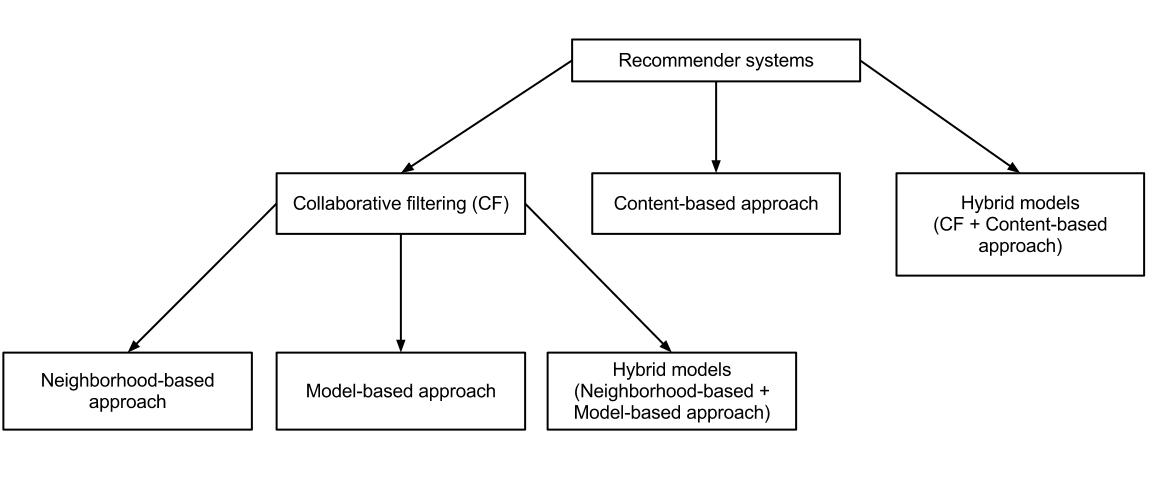

# Major Recommendation Systems 
there are Two major ways of recommendation Systems.
    1> Content based Recommendation System
    2> Collaborative Filtering Model


# Content based approach: 
    A content based recommender works with data that the user provides, either explicitly (rating) or implicitly (clicking on a link). Based on that data, a user profile is generated, which is then used to make suggestions to the user. As the user provides more inputs or takes actions on the recommendations, the engine becomes more and more accurate.

The concepts of Term Frequency (TF) and Inverse Document Frequency (IDF) are used in information retrieval systems and also content based filtering mechanisms (such as a content based recommender). They are used to determine the relative importance of a document / article / news item / movie etc.

We cannot use content based approach for this Assignment, Due to limited data availability. We shall be using collaborative filtering Model.

# Collaborative Filtering:
    The main difference between collaborative filtering and content-based filtering is conceptual. Where content-based filtering is built around the attributes of a given object, collaborative filtering relies on the behavior of users. 
   
# This approach has some distinct advantages over content-based filtering:

# 1> It benefits from large user bases. 
    Simply put, the more people are using the service, the better your recommendations will become, without doing additional development work or relying on subject area expertise.
# 2> It’s flexible across different domains.
    Collaborative filtering approaches are well suited to highly diverse sets of items. Where content-based filters rely on metadata, collaborative filtering is based on real-life activity, allowing it to make connections between seemingly disparate items (like say, an outboard motor and a fishing rod) that nonetheless might be relevant to some set of users (in this case, people who like to fish).
# 3> It produces more serendipitous recommendations. 
    When it comes to recommendations, accuracy isn’t always the highest priority. Content-based filtering approaches tend to show users items that are very similar to items they’ve already liked, which can lead to filter bubble problems. By contrast, most users have interests that span different subsets, which in theory can result in more diverse (and interesting) recommendations.
# 4> It can capture more nuance around items.
    Even a highly detailed content-based filtering system will only capture some of the features of a given item. By relying on actual human experience, collaborative filtering can sometimes recommend items that have a greater affinity with one another than a strict comparison of their attributes would suggest.

# Collaborative filtering TWO METHODS: USER-ITEM VS. ITEM-ITEM

# Item-item collaborative filtering 
    was originally developed by Amazon and draws inferences about the relationship between different items based on which items are purchased together. The more often two items (say, peanut butter and jelly) appear in the same shopping cart or user history, the “closer” they’re said to be to one another. So, when someone comes and adds peanut butter to their cart, the algorithm will suggest things that are close, like jelly or white bread, over things that aren’t, like motor oil.

# User-user filtering 
    takes a slightly different approach. Here, rather than calculating the distance between items, we calculate the distance between users based on their ratings (or likes, or whatever metric applies). When coming up with recommendations for a particular user, we then look at the users that are closest to them and then suggest items those users also liked but that our user hasn’t interacted with yet. So, if you’ve watched and liked a certain number of videos on Facebook, Facebook can look at other users who liked those same videos and recommend one that they also liked but which you might not have seen yet.

The important point here is that in both the examples above, the system has no idea why any of these items are related to one another, it only knows that they either show up in the same basket together, or that they’re liked by people with similar preferences. In some cases, though, this can be a feature rather than a shortcoming, especially in cases where the items to be filtered are extremely heterogeneous, as in online retailers or social networks. (Note: This can also lead to some unanticipated situations, as when Amazon’s algorithm began unintentionally suggesting drug paraphernalia to users who bought a particular scale.)

# Collaborative Filtering Model

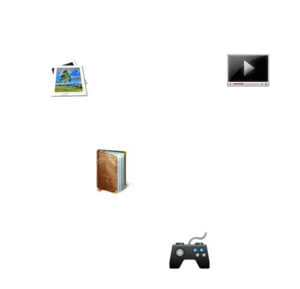

This image shows an example of predicting of the user's rating using collaborative filtering. At first, people rate different items (like videos, images, games). After that, the system is making predictions about user's rating for an item, which the user hasn't rated yet. These predictions are built upon the existing ratings of other users, who have similar ratings with the active user. For instance, in our case the system has made a prediction, that the active user won't like the video

# Challenges of Collaborative Filtering
    Complexity and expense. Collaborative filtering algorithms can run into scalability problems when the number of users and items gets too high (think in tens of millions of users and hundreds of thousands of items), especially when recommendations need to be generated in real-time online. 

Potential solution: This is where distributed clusters of machines running Hadoop or Spark come in handy. Depending on your project, it may also be possible to calculate relationships offline overnight by way of batch processing, which makes serving recommendations much quicker even if they’re no longer being updated in real-time.

# Data sparsity. Many user signals are ambiguous.
    Just watching a video doesn’t tell YouTube whether you liked that particular video or not, and just eating at a restaurant doesn’t tell Yelp whether you liked it or not. That’s why ratings are so important in collaborative-filtering systems. But users don’t rate every item they interact with, and many users don’t rate anything at all.

Potential solution: Depending on the nature of the data, there may be proxy measures that can be used. Another common technique is to assume that missing reviews are equivalent to average reviews, though this is a very strong assumption in most cases.

# The “cold start” problem. 
    As we’ve seen, collaborative-filtering can be a powerful way of recommending items based on user history, but what if there is no user history? This is called the “cold start” problem, and it can apply both to new items and to new users.  Items with lots of history get recommended a lot, while those without never make it into the recommendation engine, resulting in a positive feedback loop. At the same time, new users have no history and thus the system doesn’t have any good recommendations. 

Potential solution: Onboarding processes can learn basic info to jump-start user preferences, importing social network contacts.

# Matrix Factorization

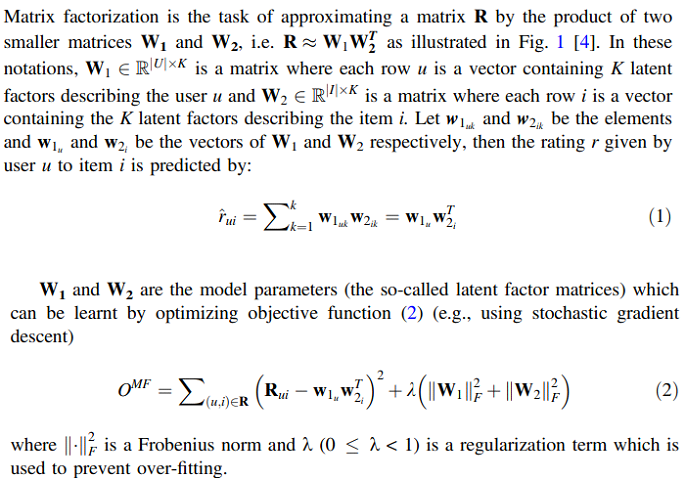

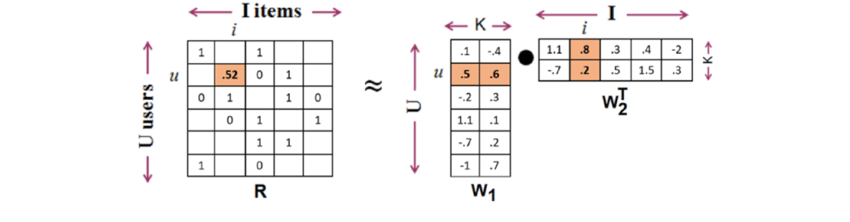

source: https://www.researchgate.net/publication/314071424_An_Approach_for_Multi-Relational_Data_Context_in_Recommender_Systems

Matrix Factorization is used for dimensional reduction. Dimensional reduction is very important in Recommender system Considering the number of users and products. The Computing cost and time shall be very high. 
More importantly the curse of dimensionality issue.the phenomena that occur when classifying, organizing, and analyzing high dimensional data that does not occur in low dimensional spaces, specifically the issue of data sparsity and “closeness” of data.

# singular value decomposition

SVD is a matrix factorization method which expresses a matrix as a linear combination of rank 1 matrices. SVD is more stable than PCA and it doesn't require a positive definite matrix.


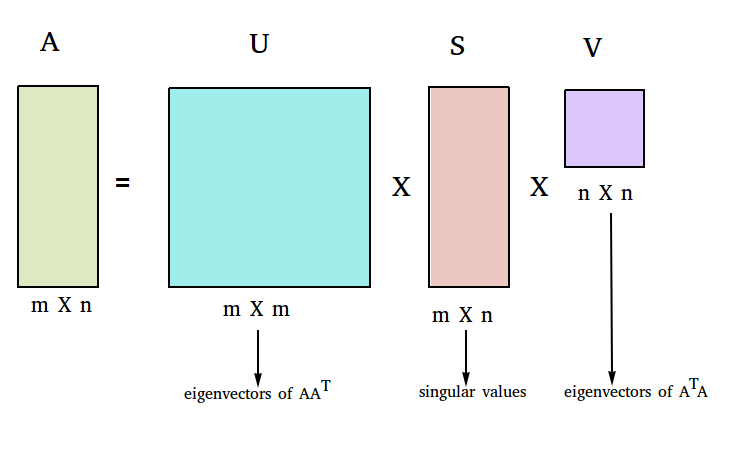

Performing SVD on the original ratings matrix (A) will result in three different matrices:

    U, an m×m matrix, where r is the rank of the utility matrix and the values correspond to the rows. U is also made up of the eigenvectors of AA^T.
    S, a diagonal matrix where all elements not on the diagonal are 0, and those on the diagonal are the singular values of the original matrix, sorted in descending order. T
    V, an n×r matrix, whole values correspond to the columns of the utility matrix, and is made up of the eigenvectors of A^TA. V is always used in its transposed form, V^T.

# SVD Method
Let's use the SVD approach to recommend best items to users.

In [48]:
ratings_matrix = amazonrating_data.pivot(index='userid', columns='productid', values='ratings').fillna(0)
userid = ratings_matrix.index
productid = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(1466, 47155)


productid,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userid,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(ratings_matrix, k = 50)
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = ratings_matrix.columns)
preds_df.head()

productid,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.001588,0.002451,-0.035895,0.004397,0.006706,0.021698,0.000436,0.008206,0.005558,-0.002057,...,0.000167,-0.058767,0.001375,-0.123896,0.025795,0.015849,0.002735,-0.176885,0.005937,-0.012155
1,-0.011001,0.000095,0.109788,0.010875,-0.003261,0.063178,-0.000852,0.016883,-0.002354,0.026892,...,-0.000023,0.010536,0.001531,0.021341,-0.041795,0.004579,0.002491,-0.026376,-0.018861,0.039145
2,-0.002794,-0.007663,0.007355,0.005759,-0.003735,-0.002737,0.007006,-0.007418,-0.002495,0.005797,...,-0.001553,-0.042050,0.000247,-0.053062,0.018583,-0.005048,-0.002397,0.078739,-0.116666,0.002829
3,0.011624,-0.006947,-0.011842,-0.001235,0.002217,-0.005592,-0.001605,0.002655,0.001673,0.001937,...,0.000576,-0.007289,0.000048,-0.047540,0.022800,0.006261,0.003486,0.005810,-0.017581,-0.025673
4,-0.002654,0.011595,0.020182,0.009237,0.005416,0.016867,0.003852,0.003173,0.005134,0.018685,...,0.000205,0.020602,0.000892,-0.022049,-0.012444,0.001050,0.000947,-0.021427,0.011899,0.013891


In [50]:
preds_df.head()

productid,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.001588,0.002451,-0.035895,0.004397,0.006706,0.021698,0.000436,0.008206,0.005558,-0.002057,...,0.000167,-0.058767,0.001375,-0.123896,0.025795,0.015849,0.002735,-0.176885,0.005937,-0.012155
1,-0.011001,0.000095,0.109788,0.010875,-0.003261,0.063178,-0.000852,0.016883,-0.002354,0.026892,...,-0.000023,0.010536,0.001531,0.021341,-0.041795,0.004579,0.002491,-0.026376,-0.018861,0.039145
2,-0.002794,-0.007663,0.007355,0.005759,-0.003735,-0.002737,0.007006,-0.007418,-0.002495,0.005797,...,-0.001553,-0.042050,0.000247,-0.053062,0.018583,-0.005048,-0.002397,0.078739,-0.116666,0.002829
3,0.011624,-0.006947,-0.011842,-0.001235,0.002217,-0.005592,-0.001605,0.002655,0.001673,0.001937,...,0.000576,-0.007289,0.000048,-0.047540,0.022800,0.006261,0.003486,0.005810,-0.017581,-0.025673
4,-0.002654,0.011595,0.020182,0.009237,0.005416,0.016867,0.003852,0.003173,0.005134,0.018685,...,0.000205,0.020602,0.000892,-0.022049,-0.012444,0.001050,0.000947,-0.021427,0.011899,0.013891


In [51]:
def recommend_items(ratings_matrix,preds_df,num_recommendations):
    for user in range(0,5):
        
        userID = ratings_matrix.iloc[user, :].name
        
        sorted_user_ratings = ratings_matrix.iloc[user].sort_values(ascending=False)
        sorted_user_predictions = preds_df.iloc[user].sort_values(ascending=False)
        temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1,sort=False)
        temp.index.name = 'Recommended Items'
        temp.columns = ['user_ratings', 'user_predictions']
        temp = temp.loc[temp.user_ratings == 0]   
        temp = temp.sort_values('user_predictions', ascending=False)
        print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
        print(temp.head(5))
    return
recommend_items(ratings_matrix,preds_df,5)


Below are the recommended items for user(user_id = A100UD67AHFODS):

                   user_ratings  user_predictions
Recommended Items                                
B0019EHU8G                  0.0          1.333911
B003ES5ZUU                  0.0          1.149443
B007OY5V68                  0.0          0.990619
B000JMJWV2                  0.0          0.928266
B009SYZ8OC                  0.0          0.837319

Below are the recommended items for user(user_id = A100WO06OQR8BQ):

                   user_ratings  user_predictions
Recommended Items                                
B000N99BBC                  0.0          1.817765
B004CLYEDC                  0.0          1.212943
B001TH7GSW                  0.0          0.969813
B00834SJSK                  0.0          0.963640
B00AQRUW4Q                  0.0          0.778536

Below are the recommended items for user(user_id = A105S56ODHGJEK):

                   user_ratings  user_predictions
Recommended Items                       

Above recommended Top 5 items to 5 users. We can see for each user different list of items are recommended based on user's previous rating behavior. 

In [52]:
# Actual ratings given by the users
ratings_matrix.head()

productid,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userid,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# Average ACTUAL rating for each item
ratings_matrix.mean().head()

productid
0594481813    0.002046
0970407998    0.003411
0972683275    0.010232
1400501466    0.010232
1400501520    0.003411
dtype: float64

In [54]:
# Predicted ratings 
preds_df.head()

productid,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.001588,0.002451,-0.035895,0.004397,0.006706,0.021698,0.000436,0.008206,0.005558,-0.002057,...,0.000167,-0.058767,0.001375,-0.123896,0.025795,0.015849,0.002735,-0.176885,0.005937,-0.012155
1,-0.011001,0.000095,0.109788,0.010875,-0.003261,0.063178,-0.000852,0.016883,-0.002354,0.026892,...,-0.000023,0.010536,0.001531,0.021341,-0.041795,0.004579,0.002491,-0.026376,-0.018861,0.039145
2,-0.002794,-0.007663,0.007355,0.005759,-0.003735,-0.002737,0.007006,-0.007418,-0.002495,0.005797,...,-0.001553,-0.042050,0.000247,-0.053062,0.018583,-0.005048,-0.002397,0.078739,-0.116666,0.002829
3,0.011624,-0.006947,-0.011842,-0.001235,0.002217,-0.005592,-0.001605,0.002655,0.001673,0.001937,...,0.000576,-0.007289,0.000048,-0.047540,0.022800,0.006261,0.003486,0.005810,-0.017581,-0.025673
4,-0.002654,0.011595,0.020182,0.009237,0.005416,0.016867,0.003852,0.003173,0.005134,0.018685,...,0.000205,0.020602,0.000892,-0.022049,-0.012444,0.001050,0.000947,-0.021427,0.011899,0.013891


In [55]:
# Average PREDICTED rating for each item
preds_df.mean().head()

productid
0594481813    0.002948
0970407998    0.003437
0972683275    0.009239
1400501466    0.004098
1400501520    0.001890
dtype: float64

In [56]:
# Let's find the RMSE 
rmse_df = pd.concat([ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(47155, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productid,,,
0594481813,0.002046,0.002948,0
0970407998,0.003411,0.003437,1
0972683275,0.010232,0.009239,2
1400501466,0.010232,0.004098,3
1400501520,0.003411,0.001890,4


In [57]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 10)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.0028459228 



In [58]:
mean_squared_error(rmse_df.Avg_actual_ratings , rmse_df.Avg_predicted_ratings,squared=False)

0.002845922813610382

# Surprise library 

Surprise has a set of built-in algorithms. 

The prediction_algorithms package includes the following prediction algorithms:

    1> random_pred.NormalPredictor	Algorithm predicting a random rating based on the distribution of the training set, which is assumed to be normal.
    2> baseline_only.BaselineOnly	Algorithm predicting the baseline estimate for given user and item.
    3> knns.KNNBasic	A basic collaborative filtering algorithm.
    4> knns.KNNWithMeans	A basic collaborative filtering algorithm, taking into account the mean ratings of each user.
    5> knns.KNNWithZScore	A basic collaborative filtering algorithm, taking into account
    6> knns.KNNBaseline	A basic collaborative filtering algorithm taking into account a baseline rating.
    7> matrix_factorization.SVD	The famous SVD algorithm, as popularized by Simon Funk during the Netflix Prize.When baselines are not used, this is equivalent to Probabilistic Matrix Factorization. 
    8> matrix_factorization.SVDpp	The SVD++ algorithm, an extension of SVD taking into account implicit ratings.
    9> matrix_factorization.NMF	A collaborative filtering algorithm based on Non-negative Matrix Factorization.
    10> slope_one.SlopeOne	A simple yet accurate collaborative filtering algorithm.
    11> co_clustering.CoClustering	A collaborative filtering algorithm based on co-clustering.

In [59]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
import numpy as np
import pandas as pd
from surprise.model_selection import cross_validate
from collections import defaultdict
from collections import Counter
from surprise.model_selection import GridSearchCV
from surprise import dump



def precision_recall_at_k(predictions,CAMatk_metricdf, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    usrid_list = []
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
        usrid_list.append(uid)

    precisions = dict()
    recalls = dict()
    fallout = dict()
    missrate= dict()
    inverseprecision= dict()
    inverserecall= dict()
    f1_score= dict()
    markedness= dict()
    informedness= dict()
    matthews_corr= dict()
    APatK = dict()
    for uid, user_ratings in user_est_true.items():
        user_metric_list = []
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        
        # Number of irrelevant items
        n_irrel = sum((true_r < threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Number of irrelevant items and recommended items in top k
        n_irrel_and_rec_k = sum(((true_r < threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])
        
        user_metric_list.append(uid)
        user_metric_list.append(k)
        
        #metric_df.loc[uid,'precision']= precisions[uid]
        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
        #metric_df.loc[uid,'precision']= precisions[uid]
        user_metric_list.append(precisions[uid])

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1
        #metric_df.loc[uid,'recall']= recalls[uid]
        user_metric_list.append(recalls[uid])
        
        # fallout@K: Proportion of irrelevant items that are recommended
        fallout[uid] = n_irrel_and_rec_k / n_irrel if n_irrel != 0 else 1
        #metric_df.loc[uid,'fallout']= fallout[uid]
        user_metric_list.append(fallout[uid])
        
        # Missrate@K : ratio of items not recommended but actually relevant to the total number of relevant items
        missrate[uid] = (n_rel - n_rel_and_rec_k)/n_rel if n_rel != 0 else 1
        #metric_df.loc[uid,'missrate']= missrate[uid]
        user_metric_list.append(missrate[uid])
        
        ''' inverseprecision@K :the ratio of items not recommended that are indeed irrelevant 
        to the total number of not recommended items'''
        inverseprecision[uid] = (n_irrel - n_irrel_and_rec_k)/(n_rel + n_irrel)
        #metric_df.loc[uid,'inverseprecision']= inverseprecision[uid]
        user_metric_list.append(inverseprecision[uid])
        
        ''' #inverserecall@k : the ratio of items not recommended that are really irrelevant to 
        the total number of irrelevant items:'''
        inverserecall[uid] = 1 - fallout[uid]
        #metric_df.loc[uid,'inverserecall']= inverserecall[uid]
        user_metric_list.append(inverserecall[uid])
        
        #f1_score : the standard harmonic mean of precision and recall
        if precisions[uid] ==0 or recalls[uid] == 0:
            f1_score[uid] = 0
        else:
            f1_score[uid] = (2*precisions[uid]*recalls[uid])/(precisions[uid] + recalls[uid])
        #metric_df.loc[uid,'f1_score']= f1_score[uid]
        user_metric_list.append(f1_score[uid])
        
        
        ''' Markedness: Markedness combines precision and inverse precision into a
        single measure and expresses how marked the classifications
        of a recommender are in comparison to chance: markedness = precision+inversePrecision-1'''
        
        markedness[uid] = precisions[uid]+inverseprecision[uid]-1
        #metric_df.loc[uid,'markedness']= markedness[uid]
        user_metric_list.append(markedness[uid])
        
        '''Informedness combines recall and inverse recall into a single
        measure and expresses how informed the classifications of a
        recommender are in comparison to chance: informedness = recall+inverseRecall-1 '''
        
        informedness[uid] = recalls[uid]+inverserecall[uid]-1
        #metric_df.loc[uid,'informedness']= informedness[uid]
        user_metric_list.append(informedness[uid])
        
        '''The Matthews Correlation combines the informedness and
        markedness measures into a single metric by calculating their geometric mean'''
       
        if informedness[uid] == 0 or markedness[uid] == 0:
            matthews_corr[uid] = 0
        else:
            matthews_corr[uid] = informedness[uid] * markedness[uid]
        
        if matthews_corr[uid] > 0:
            matthews_corr[uid] = np.sqrt(matthews_corr[uid])
        elif matthews_corr[uid] < 0:
            matthews_corr[uid] = -1*np.sqrt(-1*matthews_corr[uid])
        #metric_df.loc[uid,'matthews_corr']= matthews_corr[uid]
        user_metric_list.append(matthews_corr[uid])
        
        
      
        correct_items, sum_precision,item_count = 0,0,0
        for (est, true_r) in user_ratings[:k]:
            item_count = item_count + 1
            
            if ((true_r >= threshold) & (est >= threshold)):
                correct_items = correct_items + 1
                sum_precision = sum_precision + (correct_items/item_count)
                
        if correct_items == 0:
            APatK[uid] = 0
        else:
            APatK[uid] = sum_precision/correct_items
        
        user_metric_list.append(APatK[uid])
      
        CAMatk_metricdf.loc[len(CAMatk_metricdf.index)] = user_metric_list
        
    return CAMatk_metricdf




def get_top_n(predictions, n=10):
    
    '''Return the top-N recommendation for each user from a set of predictions.
    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.
    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    
    for uid, iid, true_r, est,_ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0

    

# Important Note: To Computation limitation and Memory limitation. We have to further reduce the dataset.

In [60]:
users = amazonrating_data_50['userid'].nunique()
items = amazonrating_data_50['productid'].nunique()
ratings = amazonrating_data_50['ratings'].count()
print("****************************")
print("Total Number of users:",users)
print("Total Number of products:",items)
print("Total Number of ratings:",ratings)
sparsity = ratings/(items*users)
print("sparsity",sparsity)

****************************
Total Number of users: 1466
Total Number of products: 47155
Total Number of ratings: 122171
sparsity 0.001767284258771579


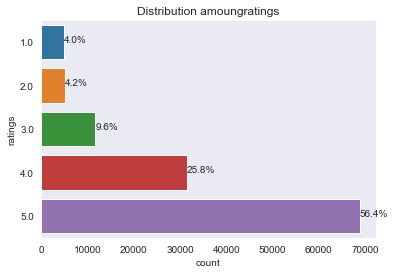

In [61]:
countplot_display(amazonrating_data_50,'ratings')

In [62]:
users = amazonrating_data_50['userid'].head(50000).nunique()
items = amazonrating_data_50['productid'].head(50000).nunique()
ratings = amazonrating_data_50['ratings'].head(50000).count()
print("****************************")
print("Total Number of users:",users)
print("Total Number of products:",items)
print("Total Number of ratings:",ratings)
sparsity = ratings/(items*users)
print("sparsity",sparsity)

****************************
Total Number of users: 1463
Total Number of products: 22081
Total Number of ratings: 50000
sparsity 0.0015477718384957044


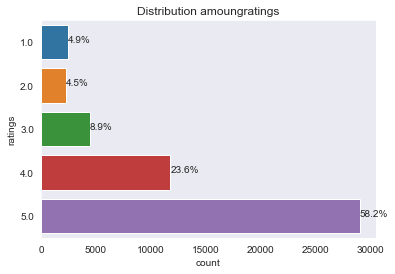

In [63]:
countplot_display(amazonrating_data_50.head(50000),'ratings')

In [64]:
amazonrating_data_prod5 = amazonrating_data_50.groupby('productid').filter(lambda x:len(x)>5)

In [65]:
users = amazonrating_data_prod5['userid'].nunique()
items = amazonrating_data_prod5['productid'].nunique()
ratings = amazonrating_data_prod5['ratings'].count()
print("****************************")
print("Total Number of users:",users)
print("Total Number of products:",items)
print("Total Number of ratings:",ratings)
sparsity = ratings/(items*users)
print("sparsity",sparsity)

****************************
Total Number of users: 1465
Total Number of products: 4461
Total Number of ratings: 57583
sparsity 0.00881098454332696


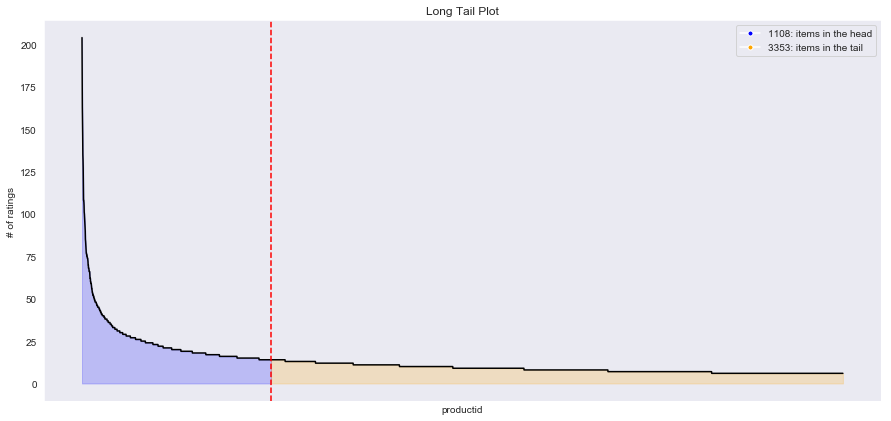

In [66]:
fig = plt.figure(figsize=(15, 7))
recmetrics.long_tail_plot(df=amazonrating_data_prod5, 
             item_id_column="productid", 
             interaction_type="ratings", 
             percentage=0.5,
             x_labels=False)

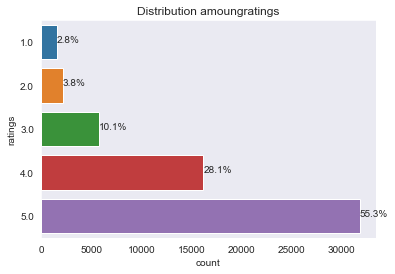

In [67]:
countplot_display(amazonrating_data_prod5,'ratings')

# Though we reduced the Dataset greatly by considering only users who has given 50 or more of ratings.
# The dataset is still huge  for the computational power of my PC. 
# Hence I have to further reduce the dataset.

# 2 Options:

    1>First 50000 records: 
    We can see the user count is reduced by 3. We have ensured max customer.
    # Whereas product count has reduced by morethan 50%. Which is not good.
    # with respect to rating distribution its same.
    

    2>Take data of products which has atleast 5 ratings. 
    Yes, I can understand we shall be losing huge amount of products.Only 10% of the products are available.
    
# Out of the above 2 option, I would really want to go with 1st option. But due to low configuration of my PC. System throws memory error. 

# Hence choosing 2nd option for further modelling.
    
# As a future enhancement, Shall need to think of an enhanced solution.

In [68]:
#df = pd.DataFrame(df,columns=amazonrating_data.columns)
df = amazonrating_data_prod5.copy(deep=False)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57583 entries, 6147 to 7824221
Data columns (total 3 columns):
userid       57583 non-null object
productid    57583 non-null object
ratings      57583 non-null float64
dtypes: float64(1), object(2)
memory usage: 4.3+ MB


In [70]:
# set rating_scale
min_rating = amazonrating_data['ratings'].min()
max_rating = amazonrating_data['ratings'].max()
print("Product's rating range is {0} to {1}".format(min_rating,max_rating))
reader = Reader(rating_scale=(min_rating, max_rating))

Product's rating range is 1.0 to 5.0


In [71]:
# Custom dataset to suprise builtin, The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[df.columns], reader)

In [72]:
trainset, testset = train_test_split(data, test_size=.30,random_state=23)

# using Suprise KNNwithMeans Algorithm, let's build item-item Collaboration Recommender

In [73]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based':False})
algo.fit(trainset)
# run the trained model against the testset
item_knn_pred = algo.test(testset)
# get RMSE
print("Item-based Model : Test Set")
df_item_knn_rmse = accuracy.rmse(item_knn_pred, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


Item-based Model : Test Set
RMSE: 1.0165


# item-item Collaboration KNNWithMeans top  5

In [74]:
top_n = get_top_n(item_knn_pred, n=5)
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A3KZ7OH4VRL048 ['B0052SCU8U', 'B0097CXWUW', 'B0034CL2ZI', 'B009NHWVIA', 'B001963NZI']
A35W3JQYP0M655 ['B00F1CRTJM', 'B00E3FHXYO', 'B007OY5V68', 'B001MXLD4G', 'B00G4UQ6U8']
AM0QLU79O05JR ['B000B6D39I', 'B002TLTG9E', 'B00EZ9XG5I', 'B004G8QO8O', 'B0045FM6SU']
A3CW0ZLUO5X2B1 ['B00JOS04PK', 'B0006I1TRY', 'B0046TEQC4', 'B000KO0GY6', 'B00IX2VGFA']
A1PPS91NLI7KEH ['B00CD8ADKO', 'B00BGIQPSG', 'B0064EL2DK', 'B00EPQ97C2', 'B005HM0SNA']
A3O4OIBCML0683 ['B005DKZTMG', 'B002YU83YO', 'B005KOZNBW']
A3GX0FAMEXV6FB ['B004G6002M', 'B005B3VO24', 'B009NHAEXE', 'B008RJZQSW', 'B00AGH81M6']
A1YEPFLLH42OU1 ['B0067I4Z6O', 'B00BOHNYU6', 'B008HK3QII', 'B002V88HFE', 'B002IO2UM2']
A2VC48WIMY6L6E ['B00BW6KCTU', 'B008EQYRRY', 'B00DUN2PBQ', 'B002SZEOLG', 'B0012IJYZ6']
A10O7THJ2O20AG ['B002BH3Z8E', 'B00B588HY2', 'B004LSNF04', 'B006W8U2MU', 'B000ABB4HC']
A4UGMKUSX9XHI ['B004CLYEDC', 'B00BWHILCY', 'B002WE4HE2', 'B0036Q7MV0', 'B00COF7DGS']
A10X9ME6R66JDX ['B0052SCU8U', 'B000Z80ICM', 'B000CRFOMK', 'B007PRHNHO', 'B002YU83YO'

A2FXBWR4T4OFQ ['B002M3SOCE', 'B00017LSPI', 'B006LW0W5Y', 'B003WGJYCY', 'B002ZIMEMW']
A3GFQHHVMEAIO ['B00004SB92', 'B001F7HLRC', 'B00005ARK3']
AM9APPMIE1BHZ ['B001OOZ1X2', 'B00EL8NJ82', 'B004CLYEDC', 'B00E6ONJJU', 'B003ZUM5LE']
A2HV76MYH7UL3S ['B008R6OPJQ', 'B0026ZPFCK', 'B004BLK24S', 'B0036WT1RW', 'B0094NXBZ0']
A2FSOHSM9X13JT ['B005LJQMCK', 'B0061RJSWC', 'B0096T97OG', 'B004V4IWHY', 'B003WUBIZQ']
AKSQNMIKOU01H ['B0042X9LC4', 'B0079M711S', 'B000UE50O2', 'B001AHALEC', 'B007P8HV2K']
A214W7SK2DJQ99 ['B00017LSPI', 'B00092GM0Q', 'B0028K2TXQ', 'B0079M711S', 'B00508ZURU']
A7FDGFK0KN7QG ['B004Y1AYAC', 'B0042X9LC4', 'B00FISD9DO', 'B0043VE28S', 'B0035LBRJO']
A506HOOCVL8GW ['B001V9KG0I', 'B007GFX0PY', 'B003XM1WE0', 'B00932N46S', 'B00104XCVO']
A11ULAZ4B5ZXC8 ['B00AYQ433U', 'B00005A1K1']
A10ZBR6O8S8OCY ['B002TLTE6Y', 'B001N85NMI', 'B00834SJSK', 'B00DLKE8C2', 'B0063705PE']
A5JLAU2ARJ0BO ['B0036Q7MV0', 'B0002CPBUK', 'B000EEQ83K', 'B00004VX3T', 'B00006JN3G']
A1T7EHCMZ92TKC ['B000BN94F8', 'B002M3SOBU', '

In [75]:
df_item_knn = pd.DataFrame(item_knn_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])   
df_item_knn['Items_rated_user'] = df_item_knn.uid.apply(get_Iu) # No of number of items rated by given user
df_item_knn['Users_rated_item'] = df_item_knn.iid.apply(get_Ui) # No of number of users rated given item

df_item_knn['err'] = abs(df_item_knn.est - df_item_knn.rui)
best_predictions = df_item_knn.sort_values('err',ascending=True).head(10)
worst_predictions = df_item_knn.sort_values('err',ascending=False).head(10)

In [76]:
# Let's check the best predictions of item-item KNNWithMeans Model
best_predictions

,uid,iid,rui,est,details,Items_rated_user,Users_rated_item,err
11735,A225G2TFM76GYX,B00EOI2SR2,5.0,5.0,"{'actual_k': 7, 'was_impossible': False}",72,20,0.0
1586,A38NHXL5257E3B,B008KVUAGU,4.0,4.0,"{'actual_k': 0, 'was_impossible': False}",41,6,0.0
10705,A1WJ3P43SZUNDM,B004ZMG55I,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",23,4,0.0
16911,A212MDP6K4VJS5,B001UI2FPE,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",28,18,0.0
17073,A3MFORLOKIOEQY,B003SGCO3E,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",40,10,0.0
10704,A27M75LRSJ788H,B00007IFED,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",42,17,0.0
16912,A2NP9CGUSFP22E,B00DW374W4,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",25,12,0.0
10708,A2EMUM49CE0JV4,B0002J2P2A,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",9,5,0.0
10699,A3B20R4ZAH0Y2Y,B00008I9K8,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",36,5,0.0
10689,AI8EMB0HUC6Z5,B003CFATT2,5.0,5.0,"{'actual_k': 6, 'was_impossible': False}",48,23,0.0


Wonderful!! Bingo!! All the 10 are perfect predictions. the set of neighbors is very small (see the actual_k field) And, it just happens that all the ratings from the neighbors are the same (and mostly, are equal to that of the target user).


In [77]:
# Let's check the best predictions of item-item KNNWithMeans Model
worst_predictions

,uid,iid,rui,est,details,Items_rated_user,Users_rated_item,err
8347,AT28RL25Q2OLK,B007X95MNG,5.0,1.0,"{'actual_k': 0, 'was_impossible': False}",47,1,4.0
11815,A2NX6MFZP8TM6S,B000BQ57BU,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",22,11,4.0
2869,AU2UJF4I7KAWL,B000S5Q9CA,1.0,5.0,"{'actual_k': 1, 'was_impossible': False}",14,27,4.0
13825,A3EWJX7W1X7E79,B002SQK2F2,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",7,53,4.0
13844,A9BWUH9XKZ2DQ,B00006RVPW,1.0,5.0,"{'actual_k': 1, 'was_impossible': False}",5,19,4.0
7046,A3QJU4FEN8PQSZ,B00EAXRVLY,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",58,9,4.0
3036,AW6A4PPENVZY3,B002MMY4WY,1.0,5.0,"{'actual_k': 1, 'was_impossible': False}",29,11,4.0
10628,A2EZTM9WY5B5IL,B00BXA7N6A,1.0,5.0,"{'actual_k': 0, 'was_impossible': False}",21,3,4.0
6917,A17W0GMB0YY83M,B0043T7FXE,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",21,30,4.0
297,A19NP8YYADOOSF,B004CJ8DKE,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",43,7,4.0



Let's focus first on the last two predictions. Well, we can't do much about them. We should have predicted $5$, but the only available neighbor had a rating of $1$. The only way to avoid this kind of errors would be to increase the min_k parameter, but it would actually worsen the accuracy.

How about the other ones? It seems that for each prediction, the users are some kind of outsiders: they rated their item with a rating of $1$ when the most of the ratings for the item where high (or inversely, rated a bad item with a rating of $5$). See the plot below as an illustration for the item 'B002SQK2F2' for which estimated rating is 1 whereas 53 users have rated this particular item.

These are situations where baseline estimates would be quite helpful, in order to deal with highly biased users (and items).

Text(0.5, 0, 'Rating value')

Text(0, 0.5, 'Number of users')

Text(0.5, 1.0, 'Number of users having rated item B002SQK2F2')

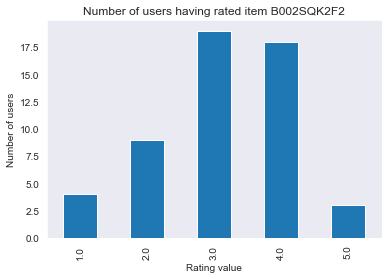

In [78]:
counter = Counter([r for (_, r) in trainset.ir[trainset.to_inner_iid('B002SQK2F2')]])
pd.DataFrame.from_dict(counter, orient='index').sort_index().plot(kind='bar', legend=False)
plt.xlabel('Rating value')
plt.ylabel('Number of users')
plt.title('Number of users having rated item B002SQK2F2')

# Using Suprise KNNwithMeans Algorithm, let's build User-User Collaboration Recommender

In [79]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based':True})
algo.fit(trainset)
# run the trained model against the testset
user_knn_pred = algo.test(testset)
# get RMSE
print("Item-based Model : Test Set")
df_item_knn_rmse = accuracy.rmse(user_knn_pred, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


Item-based Model : Test Set
RMSE: 0.9905


In [80]:
top_n = get_top_n(user_knn_pred, n=5)
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A3KZ7OH4VRL048 ['B009NHWVIA', 'B0015DYMVO', 'B0034CL2ZI', 'B007Y4BL1C', 'B0097CXWUW']
A35W3JQYP0M655 ['B00G4UQ6U8', 'B00E362W9O', 'B0002CPBWI', 'B00E3FHXYO', 'B00BQ8R76K']
AM0QLU79O05JR ['B00EZ9XG5I', 'B0055P9K38', 'B000B6D39I', 'B00D5Q75RC', 'B004G8QO8O']
A3CW0ZLUO5X2B1 ['B006LW0W5Y', 'B008JJLW4M', 'B000062VUO', 'B002UT42UI', 'B000RHZJN4']
A1PPS91NLI7KEH ['B006ZBWV0K', 'B00825BZUY', 'B00CD8ADKO', 'B0064EL2DK', 'B00ESLEAFI']
A3O4OIBCML0683 ['B005DKZTMG', 'B002YU83YO', 'B005KOZNBW']
A3GX0FAMEXV6FB ['B008RJZQSW', 'B004OVECU0', 'B00AGH81M6', 'B004G6002M', 'B005B3VO24']
A1YEPFLLH42OU1 ['B00752R4PK', 'B001D8S9E2', 'B007PJ4PKK', 'B0099SMFVQ', 'B008I21EA2']
A2VC48WIMY6L6E ['B00BW6KCTU', 'B00DUN2PBQ', 'B002SZEOLG', 'B008EQYRRY', 'B0012IJYZ6']
A10O7THJ2O20AG ['B002HZW7CK', 'B002BH3Z8E', 'B00B588HY2', 'B0097BEFYA', 'B004LSNF04']
A4UGMKUSX9XHI ['B004CLYEDC', 'B00COF7DGS', 'B009AOFKUM', 'B002UT42UI', 'B000QY9KIS']
A10X9ME6R66JDX ['B002VJL0OS', 'B009LL9VDG', 'B003ES5ZSW', 'B002V88HFE', 'B001XURP7W'

A1Y4EWMUTW73GD ['B002IKLJVE', 'B000066E6Y']
A1CMWB7AWQUQH4 ['B002WE6D44', 'B006GWO5WK', 'B006B7R9PU', 'B0043T7FXE', 'B007VPGL5U']
A30UP2KKD5IQEP ['B003ES5ZUU', 'B000N99BBC', 'B0063705PE', 'B00BDRWKX4', 'B002K9IHGI']
A15U64VGUV6RBF ['B000BKJZ9Q', 'B007WTAJTO', 'B009X01C64', 'B009PK9S90', 'B001DVZXC0']
AW6A4PPENVZY3 ['B007RZB3KM', 'B002MMY4WY', 'B001RNOHDU', 'B00FEE7B1I', 'B000067RT6']
A2XPK6XCL0UH1S ['B004CLYEE6', 'B001KURYAS', 'B002AEU3EW', 'B003O2RVGM']
A2WYF4POBUXL2O ['B001ENW61I', 'B0013AV4M4', 'B000BYCKU8']
A3FS3FJPD3RJTD ['B00884WH74', 'B004QK7HI8', 'B005FDXMJS', 'B002SZEOLG', 'B008X1BV2Y']
ARTA78TP6H73D ['B00CZ0T5NG', 'B005HMKKH4', 'B003LSTD42', 'B00A0JUNWQ', 'B00FRKOFIQ']
APBDZ88BBTN4F ['B004CLYEDC', 'B00829TIEK', 'B001OI2YNS', 'B0079R8KO0', 'B000V4VGAI']
A5Q1FK0FWU7DH ['B006U1YUZE', 'B001TOD7ME', 'B003CGMQ38', 'B00AGBVVI8', 'B002TOJXLW']
AAEVGE52KL0DJ ['B00009R6K7', 'B00CTUIT20', 'B000QUUFRW', 'B0038W0K2K', 'B00GN6PPXW']
A32QOZWIKQDNZX ['B001SJVU24', 'B001EQ4BVI']
A3R4794K2RVU1

A2NSXY5L42ZUGO ['B0013J5XZE', 'B001QUA6RA', 'B0045IIZKU', 'B003BKW2K2', 'B0009BX0AM']
AETQIN7OH0RL9 ['B00017LSPI', 'B0000BZL1P', 'B003SQEAY0', 'B001CCAISE', 'B002V88HFE']
A3GQY0TFRG0MPZ ['B00182CIB8', 'B00104XCVO', 'B003VANO7C', 'B00622AG6S', 'B001E0JH5E']
ACQYIC13JXAOI ['B000V5P90K', 'B00HVT27B8', 'B003Z6Q2JE', 'B001S4OTS6', 'B006ZBWV0K']
AGR1V15L6FLMA ['B00B46XUQU', 'B002RM08RE', 'B005DKZTMG', 'B009OBCAW2', 'B0094NXBZ0']
A2LFWJ8X817QGX ['B00E3W15P0', 'B007KXI2R8', 'B00BQ4F9ZA', 'B009F1I1C4', 'B007QXLIWI']
A2SKEQT0WTB954 ['B006U1YUZE', 'B0075SUK14', 'B004Y1AYAC', 'B006UMM2BW', 'B000PKX2KA']
A2EN82VBJT44QP ['B003MQWN40', 'B004BFZHO4', 'B002ZIMEMW', 'B00BT7RAPG', 'B003ZX8B0U']
A3FEJ8H2VTN0OJ ['B00DSUTVK4', 'B000O8I474', 'B003ES5ZUU', 'B007SZ0E1K', 'B008MDSWI4']
A3TRY87JJCA5Y8 ['B005MTME3U', 'B001AO4MWW', 'B003UI62AG', 'B005DKZTMG', 'B002SIMPXM']
AIFLY2HF8NS8U ['B00BLZDKX2', 'B009M27MB2', 'B00DTPYQBM', 'B0079UAT0A', 'B003XN24GY']
A8X478DM3KAWM ['B00AQRUW4Q', 'B000N99BBC', 'B003ZM7YTA', '

In [81]:
df_user_knn = pd.DataFrame(user_knn_pred, columns=['uid', 'iid', 'rui', 'est', 'details']) 

df_user_knn['Items_rated_user'] = df_user_knn.uid.apply(get_Iu) # No of number of items rated by given user
df_user_knn['Users_rated_item'] = df_user_knn.iid.apply(get_Ui)# No of number of users rated given item

df_user_knn['err'] = abs(df_user_knn.est - df_user_knn.rui)

best_predictions = df_user_knn.sort_values('err',ascending=True).head(10)
worst_predictions = df_user_knn.sort_values('err',ascending=False).head(10)

In [82]:
# Let's check the best predictions of user-user KNNWithMeans Model
best_predictions

,uid,iid,rui,est,details,Items_rated_user,Users_rated_item,err
17274,A200DY76VXVGP9,B0088PUEPK,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",16,21,0.0
8493,AHR86ZEYETLJI,B007B6YPAW,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",12,12,0.0
8506,A2RIL2NXHE00AQ,B000UMX7FI,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",17,9,0.0
8511,AHF4I1FSIHABC,B00004ZC8Y,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",20,9,0.0
8514,A19W47CXJJP1MI,B009NHWVIA,5.0,5.0,"{'actual_k': 7, 'was_impossible': False}",79,36,0.0
8523,A14Z6D3IRJ23F7,B006QB1RPY,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",9,14,0.0
8536,A31N0XY2UTB25C,B00BQ4F9ZA,5.0,5.0,"{'actual_k': 9, 'was_impossible': False}",66,33,0.0
8537,A3FFZQKCA7UOYY,B000OGX5AM,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",17,14,0.0
8583,A1TQZUSOU22E9M,B003EYVP12,5.0,5.0,"{'actual_k': 2, 'was_impossible': False}",60,4,0.0
8591,A3EQQHWJ1EEYEU,B003ES5ZSW,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",14,31,0.0


Wonderful!! Bingo!! All the 10 are perfect predictions. the set of neighbors is very small (see the actual_k field) And, it just happens that all the ratings from the neighbors are the same (and mostly, are equal to that of the target user).

In [83]:
# Let's check the worst predictions of user-user KNNWithMeans Model
worst_predictions

,uid,iid,rui,est,details,Items_rated_user,Users_rated_item,err
4238,AVFJ327UXPXLF,B000YM2OIK,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",49,8,4.0
6123,A54S9CIUV5VNB,B008NMCPTQ,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",35,9,4.0
10074,A25FL6VLD7S23S,B00IUICOF8,1.0,5.0,"{'actual_k': 0, 'was_impossible': False}",22,8,4.0
5979,A3D822N1K2IAQD,B007Y4TTWU,1.0,5.0,"{'actual_k': 1, 'was_impossible': False}",38,8,4.0
3792,A1BZIM4WGZ6DZP,B0035ERKYW,1.0,5.0,"{'actual_k': 0, 'was_impossible': False}",6,12,4.0
16914,A145B8OHVNNFAJ,B0063705PE,1.0,5.0,"{'actual_k': 2, 'was_impossible': False}",33,30,4.0
16678,ATNOI7E8GTIVE,B002UT42UI,1.0,5.0,"{'actual_k': 1, 'was_impossible': False}",20,27,4.0
3751,A2YEOR4XJ8N3QE,B008C1JC4O,1.0,5.0,"{'actual_k': 3, 'was_impossible': False}",25,18,4.0
4832,A3QQGPI3CTV9SX,B000VY2BC0,5.0,1.0,"{'actual_k': 1, 'was_impossible': False}",19,13,4.0
4366,A25FL6VLD7S23S,B000RZDBM2,1.0,5.0,"{'actual_k': 0, 'was_impossible': False}",22,7,4.0


It seems that for each prediction, the users are some kind of outsiders: they rated their item with a rating of $1$ when the most of the ratings for the item where high (or inversely, rated a bad item with a rating of $5$). See the plot below as an illustration for the item 'B0063705PE' for which estimated rating is 5 whereas 30 users have rated this particular item as 1.

These are situations where baseline estimates would be quite helpful, in order to deal with highly biased users (and items).

Text(0.5, 0, 'Rating value')

Text(0, 0.5, 'Number of users')

Text(0.5, 1.0, 'Number of users having rated item B0063705PE')

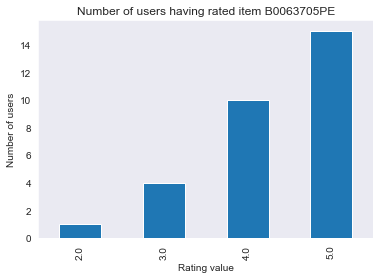

In [84]:
counter = Counter([r for (_, r) in trainset.ir[trainset.to_inner_iid('B0063705PE')]])
pd.DataFrame.from_dict(counter, orient='index').sort_index().plot(kind='bar', legend=False)
plt.xlabel('Rating value')
plt.ylabel('Number of users')
plt.title('Number of users having rated item B0063705PE')

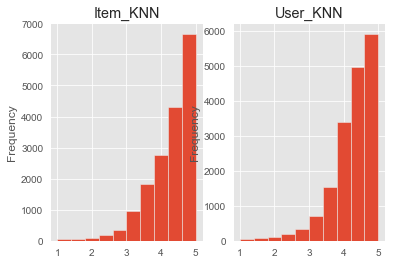

In [85]:
# How different are the predictions from both algorithms ?
# Let's count the number of predictions for each rating value

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

figure, (ax1, ax2) = plt.subplots(1, 2)

df_item_knn.est.plot(kind='hist', title='Item_KNN', ax=ax1)

df_user_knn.est.plot(kind='hist', title='User_KNN', ax=ax2)


# In both model, 5 rating is the highest. Whereas when it comes to other rating values, We can see item-item number of predictions is slightly lesser skewed then the user-user based model. 

In [86]:
# when a user has rated only a small number of items (less than 10), which algorithm
# gives the best predictions on average?
df_item_knn[df_item_knn.Items_rated_user < 10].err.mean(), df_user_knn[df_user_knn.Items_rated_user< 10].err.mean()

(0.8371292129627985, 0.7796008555099706)

# item-item Based Model gives the best prediction on average when user has rated only a small number of items(less than 10).

# Let's find the best recommender algorithm of the all the built-in algorithms of  Suprise.

In [87]:

benchmark = []
# Iterate over all algorithms
for name,algorithm in [['NormalPredictor',NormalPredictor()],
                       ['Baseline',BaselineOnly()],
                       ['SVD',SVD(random_state=23)],
                       ['SVD++',SVDpp(random_state=23)],
                       ['KNNBasic',KNNBasic(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False},verbose=True)],
                       #['KNNBasic_userbased',KNNBasic(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False},verbose=True)],
                       ['KNNWithMeans',KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False},verbose=True)],
                       #['KNNWithMeans_userbased',KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True},verbose=True)],
                       ['KNNWithZScore',KNNWithZScore(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False},verbose=True)],
                       #['KNNWithZScore_userbased',KNNWithZScore(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True},verbose=True)],
                       ['KNNBaseline',KNNBaseline(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False},verbose=True)],
                       #['KNNBaseline_userbased',KNNBaseline(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True},verbose=True)],
                       ['SlopeOne',SlopeOne()],
                       ['CoClustering',CoClustering(random_state=23,verbose=True)],
                       
                       
                       
                 ]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE','MSE','MAE'], cv=3,n_jobs=-1,verbose=True)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series(name, index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')  

Evaluating RMSE, MSE, MAE of algorithm NormalPredictor on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.2587  1.2730  1.2691  1.2669  0.0060  
MSE (testset)     1.5844  1.6206  1.6106  1.6052  0.0153  
MAE (testset)     0.9445  0.9561  0.9499  0.9502  0.0047  
Fit time          0.05    0.05    0.06    0.05    0.00    
Test time         0.16    0.15    0.15    0.15    0.00    
Evaluating RMSE, MSE, MAE of algorithm BaselineOnly on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8899  0.8999  0.9015  0.8971  0.0051  
MSE (testset)     0.7920  0.8099  0.8126  0.8048  0.0092  
MAE (testset)     0.6656  0.6720  0.6752  0.6709  0.0040  
Fit time          0.05    0.04    0.02    0.04    0.01    
Test time         0.12    0.13    0.13    0.13    0.00    
Evaluating RMSE, MSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9048  0.9047  0

,test_rmse,test_mse,test_mae,fit_time,test_time
Algorithm,,,,,
SVD++,0.895851,0.802593,0.653463,38.504739,1.255003
Baseline,0.897111,0.804834,0.670935,0.036139,0.127432
SVD,0.901349,0.812453,0.663622,3.940058,0.200693
CoClustering,0.968421,0.938040,0.678816,1.567825,0.140594
KNNBaseline,0.974642,0.949948,0.700157,1.407144,1.421133
KNNWithMeans,1.009702,1.019513,0.714293,1.709879,1.437197
KNNWithZScore,1.014367,1.028972,0.713709,1.704555,1.390417
SlopeOne,1.023868,1.048315,0.731238,0.692475,0.656549
KNNBasic,1.050400,1.103366,0.761546,1.536129,1.290669


# Evaluation Metrics:

Evaluation metrics for recommender systems can be divided into four major classes : 
    1) Predictive accuracy metrics, 
    2) Classification accuracy metrics,
    3) Rank accuracy metrics and 
    4) Non-accuracy metrics.

# Predictive Accuracy Metrics

Predictive accuracy or rating prediction metrics embark on the question of how close the ratings estimated by a recom-
mender are to the true user ratings. This type of measures is very popular for the evaluation of non-binary ratings. It
is most appropriate for usage scenarios in which an accurate prediction of the ratings for all items is of high importance.
The most important representatives of this class are 

        mean absolute error (MAE), 
        mean squared error (MSE), 
        root mean squared error (RMSE) and 
        normalized mean absolute error(NMAE) 

MSE and RMSE use the squared deviations and thus emphasize larger errors in comparison to the MAE metric. 
MAE and RMSE describe the error in the same units as the computed values, while MSE yields squared units.
NMAE normalizes the MAE metric to the range of the respective rating scale in order to make results comparable among recommenders with varying rating scales. The RMSE metric has been used in the Netflix competition in order to determine the improvement in comparison to the Cinematch algorithm as well as the prize winner. This was a significant source of discussion over the course of the competition.

# Let's Fine tune the top performing model based on RMSE

    3 Top performing model's are 
                test_rmse	test_mse	test_mae	fit_time	test_time
    Algorithm					
    Baseline	0.896739	0.804149	0.671332	0.041659	0.109350
        SVD++	0.899128	0.808435	0.654998	38.608632	1.161196
          SVD	0.901938	0.813531	0.664106	3.254448	0.140589
      
We shall use SVD model for fine tuning. Since SVD++ fit time huge, I shall use SVD model for fine tuning.

In [88]:
param_grid = {'n_factors':[50,100,200],'n_epochs': [10,20,50], 'lr_all': [0.002, 0.005,],
              'reg_all': [0.1,0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5,n_jobs=-1,joblib_verbose=99)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

# We can now use the algorithm that yields the best rmse:
algo = gs.best_estimator['rmse']
algo.fit(data.build_full_trainset())

import pandas as pd  # noqa
results_df = pd.DataFrame.from_dict(gs.cv_results)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  5.4min
[Paralle

# The fine tuned model shows slight improvisation.

Let's run the both BaselineOnly model and SVD best estimator model.

In [89]:

algo_svd = gs.best_estimator['rmse']                                                          
algo_Baselineonly = BaselineOnly()

algo_svd.fit(trainset)                             
predictions_svd = algo_svd.test(testset)
    
algo_Baselineonly.fit(trainset)
predictions_Baselinenonly = algo_Baselineonly.test(testset)
    
print(rmse(predictions_svd))
rmse(predictions_Baselinenonly)                                                                           
    
dump.dump('./dump_SVD', predictions_svd, algo_svd)
dump.dump('./dump_Baselineonly', predictions_Baselinenonly, algo_Baselineonly)

Estimating biases using als...


RMSE: 0.8895
0.8894940195290829
RMSE: 0.8950


0.8950034221241348

In [90]:
# When compared the default SVD Model, the fine tuned SVD model outperform the best Performing Baselineonly model. 

In [91]:
# The dumps have been saved and we can now use them whenever we want.

predictions_svd, algo_svd = dump.load('./dump_SVD')
predictions_Baselinenonly, algo_Baselineonly = dump.load('./dump_Baselineonly')

df_svd = pd.DataFrame(predictions_svd, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df_baselineonly = pd.DataFrame(predictions_Baselinenonly, columns=['uid','iid','rui','est','details'])    

df_svd['err'] = abs(df_svd.est - df_svd.rui)
df_baselineonly['err'] = abs(df_baselineonly.est - df_baselineonly.rui)

In [92]:
df_svd.head()

,uid,iid,rui,est,details,err
0,A3KZ7OH4VRL048,B0097CXWUW,3.0,4.066468,{'was_impossible': False},1.066468
1,A35W3JQYP0M655,B00C4034IE,4.0,4.402803,{'was_impossible': False},0.402803
2,AM0QLU79O05JR,B00EZ9XG5I,2.0,3.431770,{'was_impossible': False},1.431770
3,A3CW0ZLUO5X2B1,B001XHBNN2,5.0,4.359821,{'was_impossible': False},0.640179
4,A1PPS91NLI7KEH,B00CD8ADKO,5.0,3.987858,{'was_impossible': False},1.012142


In [93]:
df_baselineonly.head()

,uid,iid,rui,est,details,err
0,A3KZ7OH4VRL048,B0097CXWUW,3.0,4.059945,{'was_impossible': False},1.059945
1,A35W3JQYP0M655,B00C4034IE,4.0,4.377133,{'was_impossible': False},0.377133
2,AM0QLU79O05JR,B00EZ9XG5I,2.0,3.728423,{'was_impossible': False},1.728423
3,A3CW0ZLUO5X2B1,B001XHBNN2,5.0,4.279180,{'was_impossible': False},0.720820
4,A1PPS91NLI7KEH,B00CD8ADKO,5.0,4.163648,{'was_impossible': False},0.836352


# Let's check how good are the SVD predictions when the Baselineonly has a huge error:


In [94]:
print( " Here is the number of records of SVD predictions for which Baselineonly had huge error: ",
      df_svd[df_baselineonly.err >= 3.5].sort_values('err',ascending=False)['uid'].count())

 Here is the number of records of SVD predictions for which Baselineonly had huge error:  41


In [95]:
print( " Here is the number of records of Baseline predictions for which SVD had huge error: ",
      df_baselineonly[df_svd.err >= 3.5].sort_values('err',ascending=False)['uid'].count())

 Here is the number of records of Baseline predictions for which SVD had huge error:  60


In [96]:
# Let's check details of how good are the SVD predictions when the baselineonly has a huge error:
df_baselineonly[df_svd.err >= 3.5].sort_values('err',ascending=False)

,uid,iid,rui,est,details,err
9018,A19UTUEBWKIZFT,B001GIPSA2,1.0,4.889536,{'was_impossible': False},3.889536
5952,A3TA1UJWRJF9NC,B000MX48VM,1.0,4.869706,{'was_impossible': False},3.869706
10031,AVPNQUVZWMDSX,B007WTAJTO,1.0,4.860601,{'was_impossible': False},3.860601
10074,A25FL6VLD7S23S,B00IUICOF8,1.0,4.832530,{'was_impossible': False},3.832530
11978,A12EVK82QUTSA6,B00829TIA4,1.0,4.788522,{'was_impossible': False},3.788522
13014,AZMY6E8B52L2T,B004R7P28W,1.0,4.778586,{'was_impossible': False},3.778586
13844,A9BWUH9XKZ2DQ,B00006RVPW,1.0,4.770388,{'was_impossible': False},3.770388
3112,AHF4I1FSIHABC,B006TT91TW,1.0,4.769601,{'was_impossible': False},3.769601
7194,A7QMQBGJ2TCQG,B001D7REIK,1.0,4.729828,{'was_impossible': False},3.729828
11729,A1KSNK256G46GX,B00CTUIT20,1.0,4.724575,{'was_impossible': False},3.724575


In [97]:
# Let's check details of how good are the SVD predictions when the baselineonly has a huge error:
df_svd[df_baselineonly.err >= 3.5].sort_values('err',ascending=False)

,uid,iid,rui,est,details,err
9018,A19UTUEBWKIZFT,B001GIPSA2,1.0,5.000000,{'was_impossible': False},4.000000
13844,A9BWUH9XKZ2DQ,B00006RVPW,1.0,5.000000,{'was_impossible': False},4.000000
12950,A28LUOEY0ECT9G,B000KE48CM,1.0,5.000000,{'was_impossible': False},4.000000
5952,A3TA1UJWRJF9NC,B000MX48VM,1.0,5.000000,{'was_impossible': False},4.000000
10074,A25FL6VLD7S23S,B00IUICOF8,1.0,5.000000,{'was_impossible': False},4.000000
11729,A1KSNK256G46GX,B00CTUIT20,1.0,4.965260,{'was_impossible': False},3.965260
2392,A1WXG10FJ353K0,B0010WG2H2,1.0,4.952711,{'was_impossible': False},3.952711
3792,A1BZIM4WGZ6DZP,B0035ERKYW,1.0,4.949617,{'was_impossible': False},3.949617
12721,A19XMHRB3G4DIR,B000W09ZTK,1.0,4.943495,{'was_impossible': False},3.943495
7194,A7QMQBGJ2TCQG,B001D7REIK,1.0,4.921974,{'was_impossible': False},3.921974


# We can see both the models huge errors records, against each other. SVD count is having lesser huge error count then Baselineonly.

Now Let's check for the 10 worst predictions of baselineonly model relevant SVD model records.

In [98]:

df_svd.iloc[df_baselineonly.sort_values(by='err')[-10:].index]

,uid,iid,rui,est,details,err
11729,A1KSNK256G46GX,B00CTUIT20,1.0,4.965260,{'was_impossible': False},3.965260
7194,A7QMQBGJ2TCQG,B001D7REIK,1.0,4.921974,{'was_impossible': False},3.921974
3112,AHF4I1FSIHABC,B006TT91TW,1.0,4.865381,{'was_impossible': False},3.865381
13844,A9BWUH9XKZ2DQ,B00006RVPW,1.0,5.000000,{'was_impossible': False},4.000000
13014,AZMY6E8B52L2T,B004R7P28W,1.0,4.788576,{'was_impossible': False},3.788576
11978,A12EVK82QUTSA6,B00829TIA4,1.0,4.823137,{'was_impossible': False},3.823137
10074,A25FL6VLD7S23S,B00IUICOF8,1.0,5.000000,{'was_impossible': False},4.000000
10031,AVPNQUVZWMDSX,B007WTAJTO,1.0,4.878290,{'was_impossible': False},3.878290
5952,A3TA1UJWRJF9NC,B000MX48VM,1.0,5.000000,{'was_impossible': False},4.000000
9018,A19UTUEBWKIZFT,B001GIPSA2,1.0,5.000000,{'was_impossible': False},4.000000


In [99]:
df_baselineonly.iloc[df_svd.sort_values(by='err')[-10:].index]

,uid,iid,rui,est,details,err
7194,A7QMQBGJ2TCQG,B001D7REIK,1.0,4.729828,{'was_impossible': False},3.729828
12721,A19XMHRB3G4DIR,B000W09ZTK,1.0,4.712568,{'was_impossible': False},3.712568
3792,A1BZIM4WGZ6DZP,B0035ERKYW,1.0,4.710644,{'was_impossible': False},3.710644
2392,A1WXG10FJ353K0,B0010WG2H2,1.0,4.721230,{'was_impossible': False},3.721230
11729,A1KSNK256G46GX,B00CTUIT20,1.0,4.724575,{'was_impossible': False},3.724575
12950,A28LUOEY0ECT9G,B000KE48CM,1.0,4.696251,{'was_impossible': False},3.696251
9018,A19UTUEBWKIZFT,B001GIPSA2,1.0,4.889536,{'was_impossible': False},3.889536
5952,A3TA1UJWRJF9NC,B000MX48VM,1.0,4.869706,{'was_impossible': False},3.869706
10074,A25FL6VLD7S23S,B00IUICOF8,1.0,4.832530,{'was_impossible': False},3.832530
13844,A9BWUH9XKZ2DQ,B00006RVPW,1.0,4.770388,{'was_impossible': False},3.770388


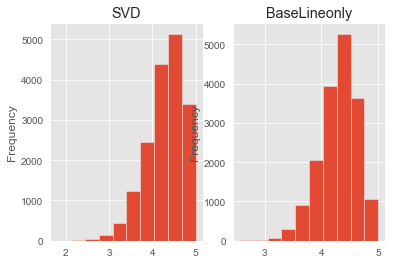

In [100]:
# Let's count the number of predictions for each rating value

figure, (ax1, ax2) = plt.subplots(1, 2)

gg = df_svd.est.plot(kind='hist', title='SVD', ax=ax1)
gg= df_baselineonly.est.plot(kind='hist', title='BaseLineonly', ax=ax2)

# The SVD algorithm seems more confortable predicting extreme rating values.
# Baselineonly is less skweded then SVD. 


In [101]:
#  when a user has rated only a small number of items (less than 10), which algorithm
# gives the best predictions on average?

    
df_baselineonly['Iu'] = df_baselineonly.uid.apply(get_Iu)
df_svd['Iu'] = df_svd.uid.apply(get_Iu)

print( "Baselineonly:\t" +str(df_baselineonly[df_baselineonly.Iu < 10].err.mean())+ "\nSVD:\t"+ 
      str(df_svd[df_svd.Iu < 10].err.mean()))

Baselineonly:	0.836248079138649
SVD:	0.7817046105940715


# As per above test,  when a user has rated only a small number of items (less than 10), SVD outperforms Baselineonly model.

# Here is the Top 5 recommendations for each user using Baselineonly Model.

In [102]:
top_n = get_top_n(predictions_Baselinenonly, n=5)
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A3KZ7OH4VRL048 ['B0052SCU8U', 'B009NHWVIA', 'B0034CL2ZI', 'B009AOFKUM', 'B00C25I5TE']
A35W3JQYP0M655 ['B00G4UQ6U8', 'B001MXLD4G', 'B003ZUM5LE', 'B00E3FHXYO', 'B00G4V0QSK']
AM0QLU79O05JR ['B00D5Q75RC', 'B000B6D39I', 'B002TLTG9E', 'B00EZ9XG5I', 'B004G8QO8O']
A3CW0ZLUO5X2B1 ['B003ES5ZUU', 'B004CLYEDC', 'B006LW0W5Y', 'B008JJLW4M', 'B00IX2VGFA']
A1PPS91NLI7KEH ['B00CD8ADKO', 'B006ZBWV0K', 'B0064EL2DK', 'B00BGIQPSG', 'B00EL8NJ82']
A3O4OIBCML0683 ['B002YU83YO', 'B005DKZTMG', 'B005KOZNBW']
A3GX0FAMEXV6FB ['B000QUUFRW', 'B004G6002M', 'B009NHAEXE', 'B005B3VO24', 'B008RJZQSW']
A1YEPFLLH42OU1 ['B0099SMFVQ', 'B00BOHNYU6', 'B002V88HFE', 'B000BQ7GW8', 'B002IO2UM2']
A2VC48WIMY6L6E ['B00BW6KCTU', 'B008EQYRRY', 'B0012IJYZ6', 'B00DUN2PBQ', 'B002SZEOLG']
A10O7THJ2O20AG ['B006W8U2MU', 'B007WTAJTO', 'B00017LSPI', 'B00B588HY2', 'B002BH3Z8E']
A4UGMKUSX9XHI ['B0036Q7MV0', 'B004CLYEDC', 'B002WE4HE2', 'B00COF7DGS', 'B00AEKEA48']
A10X9ME6R66JDX ['B0052SCU8U', 'B0046TJG1U', 'B002YU83YO', 'B000CRFOMK', 'B002V88HFE'

A2PB325LKXYDOL ['B002BH3Z8E', 'B000Q85WRC', 'B003YNQ6MG', 'B000I20AJ6', 'B004GF1PC2']
A4IL0CLL27Q33 ['B00DR6DQZA', 'B001E1Y5O6', 'B004XW2NEW', 'B00475K64E', 'B00008W2LC']
A1E1LEVQ9VQNK ['B00609B3J2', 'B0082E9K7U', 'B00APCMMDG', 'B000VX6XL6', 'B000M2GYF6']
A1ZPY91VE3IDN1 ['B002C1BHIO', 'B0079UAT0A', 'B00DRA4B6Y', 'B00KJJW36G', 'B005I6EU48']
A213J54E63SYOP ['B003NR57BY', 'B00E3W15P0', 'B000FBK3QK', 'B00B5HE3UU', 'B008CXTX7S']
AW5JSQCHC2ZJO ['B007PJ4PKK', 'B005PUZOYM', 'B005IHAIC0', 'B00CCIKJDG', 'B00ECUF5FE']
A1F1A0QQP2XVH5 ['B00BOHNYU6', 'B004Q3R9AQ', 'B00746YHV6', 'B001M4HXB2', 'B003CJTQJC']
A3L9E0YI7C5G0W ['B003ES5ZUU', 'B000OFWJO6', 'B0053OLY9O', 'B001GS8G2E', 'B0002KVQBA']
A3F7USIDJBR8WU ['B00006RVPW', 'B000ABB4HC', 'B00834SJNA', 'B004J3V90Y', 'B0007TJ5AK']
A3077MQTAKOVFZ ['B003ES5ZUU', 'B0088PUEPK', 'B00762YNMG', 'B005JACJ50', 'B00001P4ZH']
A28X0LT2100RL1 ['B003ES5ZUU', 'B002Y6CJJ8', 'B000CSOXTO', 'B002WE4HE2', 'B00006JN3G']
A35KBAQ4VBNQ6L ['B003WGJYCY', 'B00BGGDVOO', 'B006R38IJY',

A3RR2P5IS3DGPR ['B00E87E1OM', 'B004ZNA3UA', 'B006ZH0L2E', 'B00008W2LC', 'B0094R4PBU']
A3977M5S0GIG5H ['B001TH7T2U', 'B002V88HFE', 'B005CWHZP4', 'B0000BVYTV', 'B007ABIY4Q']
A3M82NO6OU1FHS ['B00BQ4F9ZA', 'B00006B7DA', 'B004X8EO6Q', 'B00BQ5RY1G', 'B008U69LC4']
A2NVQZ4Y7Y0J1R ['B003ES5ZUU', 'B004F9P2KU', 'B000O8WE66', 'B000EMWBV0', 'B000ZSUQ9M']
A27ADCSD15F3GL ['B000N99BBC', 'B0036Q7MV0', 'B009VV56TY', 'B003ES5ZQE', 'B000RZQZM0']
A33152QEGO2MZN ['B000IJY8DS', 'B00622AG6S', 'B004HHICKC', 'B003ZSP0WW', 'B002K3Z3E8']
A1VYFEJM12ZP11 ['B000P1O73A', 'B00IF4OATU', 'B004CLYEH8', 'B000LRMS66', 'B003FGB8H0']
AA91O96C1Z18W ['B00EOI2SR2', 'B00CF7E0R0', 'B00E6ONJJU', 'B00DQZQ16S', 'B008X9Z528']
A3H4S6YO9VNGDZ ['B00017LSPI', 'B0019EHU8G', 'B009NB8WR0', 'B008JJLW4M', 'B00212NO6W']
A298GL2D0BHGKZ ['B003ES5ZUU', 'B000VX6XL6', 'B001NTFATI', 'B004HHICKC', 'B003WV5DJC']
A2UCDLO7V7DG6 ['B001O4EPHA', 'B002A92OVM']
A1R6RKKE44AYA8 ['B00834SJSK', 'B0039BPG1U', 'B003ZX8B0U']
AXP8GO5Q3AXSA ['B00834SJSK', 'B001S4OTS6

# Here is the Top 5 recommendations for each user using SVD Model.

In [103]:
top_n = get_top_n(predictions_svd, n=5)
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A3KZ7OH4VRL048 ['B0052SCU8U', 'B009NHWVIA', 'B0034CL2ZI', 'B009AOFKUM', 'B00C25I5TE']
A35W3JQYP0M655 ['B00G4UQ6U8', 'B00E3FHXYO', 'B003ZUM5LE', 'B001MXLD4G', 'B00BQ8R76K']
AM0QLU79O05JR ['B002TLTG9E', 'B000B6D39I', 'B00D5Q75RC', 'B00EZ9XG5I', 'B0045FM6SU']
A3CW0ZLUO5X2B1 ['B008JJLW4M', 'B006LW0W5Y', 'B00IX2VGFA', 'B0006I1TRY', 'B003ES5ZUU']
A1PPS91NLI7KEH ['B00CD8ADKO', 'B0064EL2DK', 'B00BGIQPSG', 'B006ZBWV0K', 'B00EPQ97C2']
A3O4OIBCML0683 ['B002YU83YO', 'B005DKZTMG', 'B005KOZNBW']
A3GX0FAMEXV6FB ['B000QUUFRW', 'B005B3VO24', 'B004G6002M', 'B009NHAEXE', 'B008RJZQSW']
A1YEPFLLH42OU1 ['B0099SMFVQ', 'B008HK3QII', 'B00BOHNYU6', 'B006QB1RPY', 'B007PJ4PKK']
A2VC48WIMY6L6E ['B00BW6KCTU', 'B008EQYRRY', 'B00DUN2PBQ', 'B0012IJYZ6', 'B002SZEOLG']
A10O7THJ2O20AG ['B002BH3Z8E', 'B00B588HY2', 'B006W8U2MU', 'B007WTAJTO', 'B000ABB4HC']
A4UGMKUSX9XHI ['B0036Q7MV0', 'B00AEKEA48', 'B004CLYEDC', 'B00COF7DGS', 'B000QY9KIS']
A10X9ME6R66JDX ['B0052SCU8U', 'B0046TJG1U', 'B000CRFOMK', 'B002YU83YO', 'B000051299'

A23NSKTMSPPBTR ['B000M17AVO', 'B002N2EHVQ', 'B000N99BBC', 'B001S4OTS6', 'B00G4UQ6U8']
A19NP8YYADOOSF ['B009YQ8BTI', 'B00EOE4G4E', 'B00JF0D7RE', 'B0093IZOV0', 'B000652M6Y']
A1BJOHHLG0D965 ['B004CLYEDC', 'B00BOHNYTW', 'B0045JHJSS', 'B001FWBUUG', 'B002QEBMAK']
A2ZY3S7SD3QO8Z ['B0035FZ13I', 'B004M18O60', 'B0035FZ11K', 'B0094S35W4', 'B00CRY250U']
A1CPRP3VFJRS1R ['B0010Y414Q', 'B00006RVPW', 'B00008OE6I', 'B000AP05BO', 'B0058NN6CS']
A3SX5MZTCZRQLF ['B0007QKMQY', 'B00IVPU5BK', 'B00EU9V3YO', 'B001QTXL82', 'B001S0PWWC']
A9LNWA25IM2DX ['B0052SCU8U', 'B005KQ2O26', 'B001E25JOA', 'B00A0JUNWQ', 'B005DSPLCQ']
A15CL28ALB7MTZ ['B0010WG2H2', 'B004Q3R9B0', 'B008ALA6DW', 'B00HFRWWAM', 'B00DR8LA60']
AL1XV4L25FZ2S ['B002IKLJU0', 'B002Y6CJJ8', 'B001TH7GVE', 'B004Q0PT3I', 'B001M4N956']
A2X3L31KCXBHCL ['B005LAIFE2', 'B001QATRCA', 'B00BUER7EC', 'B004ZP74IW', 'B00871F9E6']
A3F3B1JPACN215 ['B001P05NBA', 'B00HZR4DNG', 'B00G4E2IRE', 'B003LVZO8S', 'B00829THEG']
A2LEIANN1UZTHP ['B000067SG2', 'B004Q3R9AQ', 'B0044DEDC0'

A1RPTVW5VEOSI ['B003ES5ZUU', 'B005LJQMCK', 'B001ISKNKA', 'B00A6HYP1W', 'B0037LQY7M']
A14Z6D3IRJ23F7 ['B003ZSP0WW', 'B000CRFOMK', 'B003CFATT2', 'B006QB1RPY', 'B002HWRJBC']
A28UMA3GW9L124 ['B008JJLW4M', 'B000N99BBC', 'B0002WPREU', 'B004275EO4', 'B008HO9DK4']
A2SZLNSI5KOQJT ['B0046TJG1U', 'B00HWMPRKM', 'B000SXWGA6', 'B003FGF2MC', 'B00CE590Z0']
A1C5WS021EL3WO ['B001TH7GUU', 'B004C3AW40', 'B007FH1KX2', 'B008ZGKWQI', 'B00E3W15P0']
AHIK7BUXFRMT8 ['B00212NO6W', 'B001TH7GSW', 'B001TOD7ME', 'B001PIBE8I', 'B00003006E']
A18L9A64XNGVGU ['B003VANO7C', 'B002MAPRYU', 'B003S6ID20', 'B002RM08RE']
A1QQA7Y92L4F9R ['B002YU83YO', 'B001C271MA', 'B001S4OTS6', 'B0001VGFKW', 'B000VE2RP6']
A3TP31S61PPE3G ['B003I4FHNA', 'B009SYZ8OC', 'B00A3YDPWS', 'B0094R4PBU', 'B009AR2MF0']
A22R9L5DAVYYWR ['B002WE6D44', 'B0007QU6WY', 'B0011ZH0BK', 'B003SVSJ1K', 'B000FKP7TY']
A2DIQTZPF26T1L ['B009NHAEXE', 'B004GF1PC2', 'B008M9U3BM', 'B00DR0PDNE']
AYO1146CBIV5C ['B000QWG43Y', 'B00CS4X8QE', 'B00CTSOISQ', 'B009APBY0G', 'B004HYGEOQ']

A1Q5P5ML3176C0 ['B0016D1I0G', 'B00005N6KG', 'B001G5ZTLS', 'B0038W0K2K']
AMZCZBK1EF1PV ['B00DR6DQZA', 'B003ATZBWA', 'B00BFYVXRY', 'B00CD778LC', 'B00AO1L1RG']
A3INN916E4VION ['B000HPV3RW', 'B002WE6D44', 'B004Q0PT3I', 'B003UE52ME', 'B0097BEFYA']
A1FR68QH6Z4YZM ['B000BY52NK', 'B007BJHETS', 'B00BT7RAPG', 'B009LL9VDG', 'B000EXRSVM']
AWZR0O65DL2Q ['B00395ZQMK', 'B000FBK3QK', 'B005FVDTAW', 'B008EWNVI4', 'B001GX6MJ8']
A2AEZQ3DGBBLPR ['B000FITKK8', 'B00428N9OK', 'B005X64MN2', 'B009T0NNRO', 'B00005AW1H']
A3H6NNGCINPLEC ['B00834SJSK', 'B00109Y2DQ', 'B001G5ZTPY', 'B0067SF63A', 'B001VEIZY2']
A2DKQQIZ793AV5 ['B004XW2NEW', 'B00D5T3QK4', 'B00DR8LA60', 'B00DIOALPE', 'B00JQTNVL6']
A2V1J3JT5OOZFO ['B00CEZBKTO', 'B003I4FHNA', 'B000WYVBR0', 'B0018MEBNG', 'B006GWO5WK']
A3S3R88HA0HZG3 ['B001NTFAOS', 'B00EH5TWT4', 'B000AP05BO', 'B00I0G8GNY', 'B0079UAT0A']
A8WEXFRWX1ZHH ['B009APBY0G', 'B001QUA6R0', 'B002SZEOLG', 'B00BQ5RY1G', 'B00429N16A']
A2A4X545ERLS7H ['B00006HSYC', 'B005H3I38Q', 'B003X7TRWE', 'B00081A2KY', 

These predictive accuracy error metrics are frequently used for the evaluation of recommender systems since they are easy to compute and understand. They are well-studied and are also applied in many contexts other than recommender systems. However, they do not necessarily correspond directly to the most popular usage scenarios for recommender systems. There are few cases where users are in fact interested in the overall prediction accuracy. Recommender systems are more commonly used to display a limited list of top ranked items or the set of all items that have been rated above a certain threshold. Many recommendation algorithms are able to provide more accurate statements about a limited set of items that the user either likes or dislikes. The estimations for many other items are rather inaccurate but often also significantly less important to users. This applies in particular to e-commerce applications where we are usually more concerned with suggesting some 
products to customers that they will like in comparison to estimating the most accurate ratings for the large amount of
items that customers would never purchase.

# Classification accuracy metrics 
They try to assess the successful decision making capacity (SDMC) of recommendation algorithms. They measure the amount of correct and incorrect classifications as relevant or irrelevant items that are made by the recommender system and are therefore useful for user tasks such as finding good items. SDMC metrics ignore the exact rating or ranking of items as only the correct or incorrect classifiation is measured . This type of metric is particularly suitable for applications in e-commerce that try to convince users of making certain decisions such as purchasing products or services.

# Precision or true positive accuracy (Confidence)
    Precision is calculated as the ratio of recommended items that are relevant to the total number of recommended items:
    
        precision = tpa =tp/tp + fp
        
# Recall or true positive rate (sensitivity)
    Recall is calculated as the ratio of recommended items that are relevant to the total number of relevant items:
   
        recall = tpr =tp/tp + fn

# Fallout or false positive rate 
    Fallout is calculated as the ratio of recommended items that are irrelevant to the total number of irrelevant items:
        
        fallout = fpr =fp/fp + tn
    This is the probability that an irrelevant item is recommended.

# Miss rate or false negative rate 
    Miss rate is calculated as the ratio of items not recommended but actually relevant to the total number of relevant items:
        
        missRate = fnr =fn/tp + fn
    This is the probability that a relevant item is not recommended.

# Inverse precision or true negative accuracy 
    Inverse precision is calculated as the ratio of items not recommended that are indeed irrelevant to the total number of not recommended items:
       
       inversePrecision = tna =tn/fn + tn
    This is the probability that an item which is not recommended is indeed irrelevant.
    
# Inverse recall or true negative rate (also called specificity)
    Inverse recall is calculated as the ratio of items not recommended that are really irrelevant to the total number of irrelevant items:
    
    inverseRecall = tnr =tn/fp + tn= 1 - fpr
    This is the probability that an irrelevant item is indeed not recommended.

# The F1-measure 
    try to combine precision and recall into a single score by calculating different types of means of both metrics. The F1-measure or F1-score is calculated as the standard harmonic mean of precision and recall:
    
        F1 =(2 * precision * recall)/(precision+recall)


# Markedness 
    Markedness combines precision and inverse precision into a single measure and expresses how marked the classifications
    of a recommender are in comparison to chance:
    
    markedness = precision+inversePrecision-1
               =(tp/(tp + fp)) + (tn/(fn + tn)) - 1
               
# Informedness 
    combines recall and inverse recall into a single measure and expresses how informed the classifications of a recommender are in comparison to chance:
    
    informedness = recall+inverseRecall-1
                 =(tp/(tp + fn))+(tn/(fp + tn)) - 1
                 
    Both markedness and informedness return values in the range [-1, 1].
    
# The Matthews Correlation 
    combines the informedness and markedness measures into a single metric by calculating their geometric mean:
    correlation = (tp * tn) - (fp * fn) /sqrt((tp + fn) * (fp + tn) * (tp + fp) *(fn + tn))
                = +/-sqrt(informedness * markedness)


# Let's Compute all the Classification Accuracy Matrix using Baselineonly Model prediction results.

In [104]:
baselineonly_MAPatk_metricdf = pd.DataFrame({},columns=['k','MAP'])
baselineonly_Average_metricdf = pd.DataFrame({},columns=['k','Precision_Avg','recall_Avg','fallout_avg',
                                            'missrate_avg','inv_prec_avg','inv_recall_avg',
                                            'f1score_avg','markedness_avg','informedness_avg',
                                            'matthews_corr_avg'])

baselineonly_CAMatk_metricdf = pd.DataFrame({},columns=['uid','k','precision','recall',
                                           'fallout','missrate',
                                           'inverseprecision','inverserecall',
                                           'f1_score','markedness',
                                           'informedness','matthews_corr','AP'])
for i in range(1,11):
    baselineonly_CAMatk_metricdf = precision_recall_at_k(predictions_Baselinenonly,baselineonly_CAMatk_metricdf, k=i, threshold=3.5)
                               
    baselineonly_Average_metricdf.loc[len(baselineonly_Average_metricdf.index)] = [i,baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i]['precision'].mean(),
                                                         baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i]['recall'].mean(),
                                                         baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i]['fallout'].mean(),
                                                         baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i]['missrate'].mean(),
                                                         baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i]['inverseprecision'].mean(),
                                                         baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i]['inverserecall'].mean(),
                                                         baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i]['f1_score'].mean(),
                                                         baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i]['markedness'].mean(),
                                                         baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i]['informedness'].mean(),
                                                         baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i]['matthews_corr'].mean()]
                                                         
                                                         
    baselineonly_MAPatk_metricdf.loc[len(baselineonly_MAPatk_metricdf.index)] = [i,baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i]['AP'].mean()]
    

In [105]:
baselineonly_CAMatk_metricdf.head()

,uid,k,precision,recall,fallout,missrate,inverseprecision,inverserecall,f1_score,markedness,informedness,matthews_corr,AP
0,A3KZ7OH4VRL048,1,1.0,0.083333,0.0,0.916667,0.076923,1.0,0.153846,0.076923,0.083333,0.080064,1.0
1,A35W3JQYP0M655,1,1.0,0.066667,0.0,0.933333,0.166667,1.0,0.125000,0.166667,0.066667,0.105409,1.0
2,AM0QLU79O05JR,1,0.0,0.000000,0.2,1.000000,0.500000,0.8,0.000000,-0.500000,-0.200000,0.316228,0.0
3,A3CW0ZLUO5X2B1,1,1.0,0.035714,0.0,0.964286,0.200000,1.0,0.068966,0.200000,0.035714,0.084515,1.0
4,A1PPS91NLI7KEH,1,1.0,0.142857,0.0,0.857143,0.300000,1.0,0.250000,0.300000,0.142857,0.207020,1.0


In [106]:
baselineonly_Average_metricdf.head()

,k,Precision_Avg,recall_Avg,fallout_avg,missrate_avg,inv_prec_avg,inv_recall_avg,f1score_avg,markedness_avg,informedness_avg,matthews_corr_avg
0,1.0,0.928077,0.166485,0.351771,0.837665,0.149262,0.648229,0.249434,0.077339,-0.185286,0.142175
1,2.0,0.913209,0.299973,0.401207,0.704177,0.132237,0.598793,0.402921,0.045446,-0.101234,0.155185
2,3.0,0.903642,0.416435,0.457253,0.587714,0.116076,0.542747,0.513907,0.019718,-0.040817,0.148600
3,4.0,0.897822,0.515666,0.503459,0.488484,0.103053,0.496541,0.598551,0.000875,0.012206,0.133001
4,5.0,0.890387,0.598537,0.554320,0.405612,0.090424,0.445680,0.662086,-0.019188,0.044217,0.114251


In [107]:
baselineonly_MAPatk_metricdf.head()

,k,MAP
0,1.0,0.927386
1,2.0,0.953320
2,3.0,0.950438
3,4.0,0.943599
4,5.0,0.939792


# Let's Compute all the Classification Accuracy Matrix using SVD Model prediction results.

In [108]:
svd_MAPatk_metricdf = pd.DataFrame({},columns=['k','MAP'])
svd_Average_metricdf = pd.DataFrame({},columns=['k','Precision_Avg','recall_Avg','fallout_avg',
                                            'missrate_avg','inv_prec_avg','inv_recall_avg',
                                            'f1score_avg','markedness_avg','informedness_avg',
                                            'matthews_corr_avg'])

svd_CAMatk_metricdf = pd.DataFrame({},columns=['uid','k','precision','recall',
                                           'fallout','missrate',
                                           'inverseprecision','inverserecall',
                                           'f1_score','markedness',
                                           'informedness','matthews_corr','AP'])
for i in range(1,11):
    svd_CAMatk_metricdf = precision_recall_at_k(predictions_svd,svd_CAMatk_metricdf, k=i, threshold=3.5)
                               
    svd_Average_metricdf.loc[len(svd_Average_metricdf.index)] = [i,svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i]['precision'].mean(),
                                                         svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i]['recall'].mean(),
                                                         svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i]['fallout'].mean(),
                                                         svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i]['missrate'].mean(),
                                                         svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i]['inverseprecision'].mean(),
                                                         svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i]['inverserecall'].mean(),
                                                         svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i]['f1_score'].mean(),
                                                         svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i]['markedness'].mean(),
                                                         svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i]['informedness'].mean(),
                                                         svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i]['matthews_corr'].mean()]
                                                         
                                                         
    svd_MAPatk_metricdf.loc[len(svd_MAPatk_metricdf.index)] = [i,svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i]['AP'].mean()]
    

In [109]:
svd_CAMatk_metricdf.head()

,uid,k,precision,recall,fallout,missrate,inverseprecision,inverserecall,f1_score,markedness,informedness,matthews_corr,AP
0,A3KZ7OH4VRL048,1,1.0,0.083333,0.0,0.916667,0.076923,1.0,0.153846,0.076923,0.083333,0.080064,1.0
1,A35W3JQYP0M655,1,1.0,0.066667,0.0,0.933333,0.166667,1.0,0.125000,0.166667,0.066667,0.105409,1.0
2,AM0QLU79O05JR,1,1.0,0.333333,0.0,0.666667,0.625000,1.0,0.500000,0.625000,0.333333,0.456435,1.0
3,A3CW0ZLUO5X2B1,1,1.0,0.035714,0.0,0.964286,0.200000,1.0,0.068966,0.200000,0.035714,0.084515,1.0
4,A1PPS91NLI7KEH,1,1.0,0.142857,0.0,0.857143,0.300000,1.0,0.250000,0.300000,0.142857,0.207020,1.0


In [110]:
svd_Average_metricdf.head()

,k,Precision_Avg,recall_Avg,fallout_avg,missrate_avg,inv_prec_avg,inv_recall_avg,f1score_avg,markedness_avg,informedness_avg,matthews_corr_avg
0,1.0,0.932227,0.165849,0.347593,0.838301,0.150573,0.652407,0.249204,0.082800,-0.181744,0.138543
1,2.0,0.919433,0.298489,0.396103,0.705660,0.135498,0.603897,0.402728,0.054930,-0.097614,0.153722
2,3.0,0.907561,0.410370,0.449543,0.593780,0.120250,0.550457,0.510795,0.027811,-0.039174,0.151088
3,4.0,0.904334,0.509308,0.489975,0.494841,0.109070,0.510025,0.596486,0.013404,0.019334,0.135078
4,5.0,0.896934,0.588712,0.538297,0.415438,0.096933,0.461703,0.658313,-0.006133,0.050414,0.117927


In [111]:
svd_MAPatk_metricdf.head()

,k,MAP
0,1.0,0.926003
1,2.0,0.952628
2,3.0,0.949574
3,4.0,0.943292
4,5.0,0.939204


# Precision Recall plot

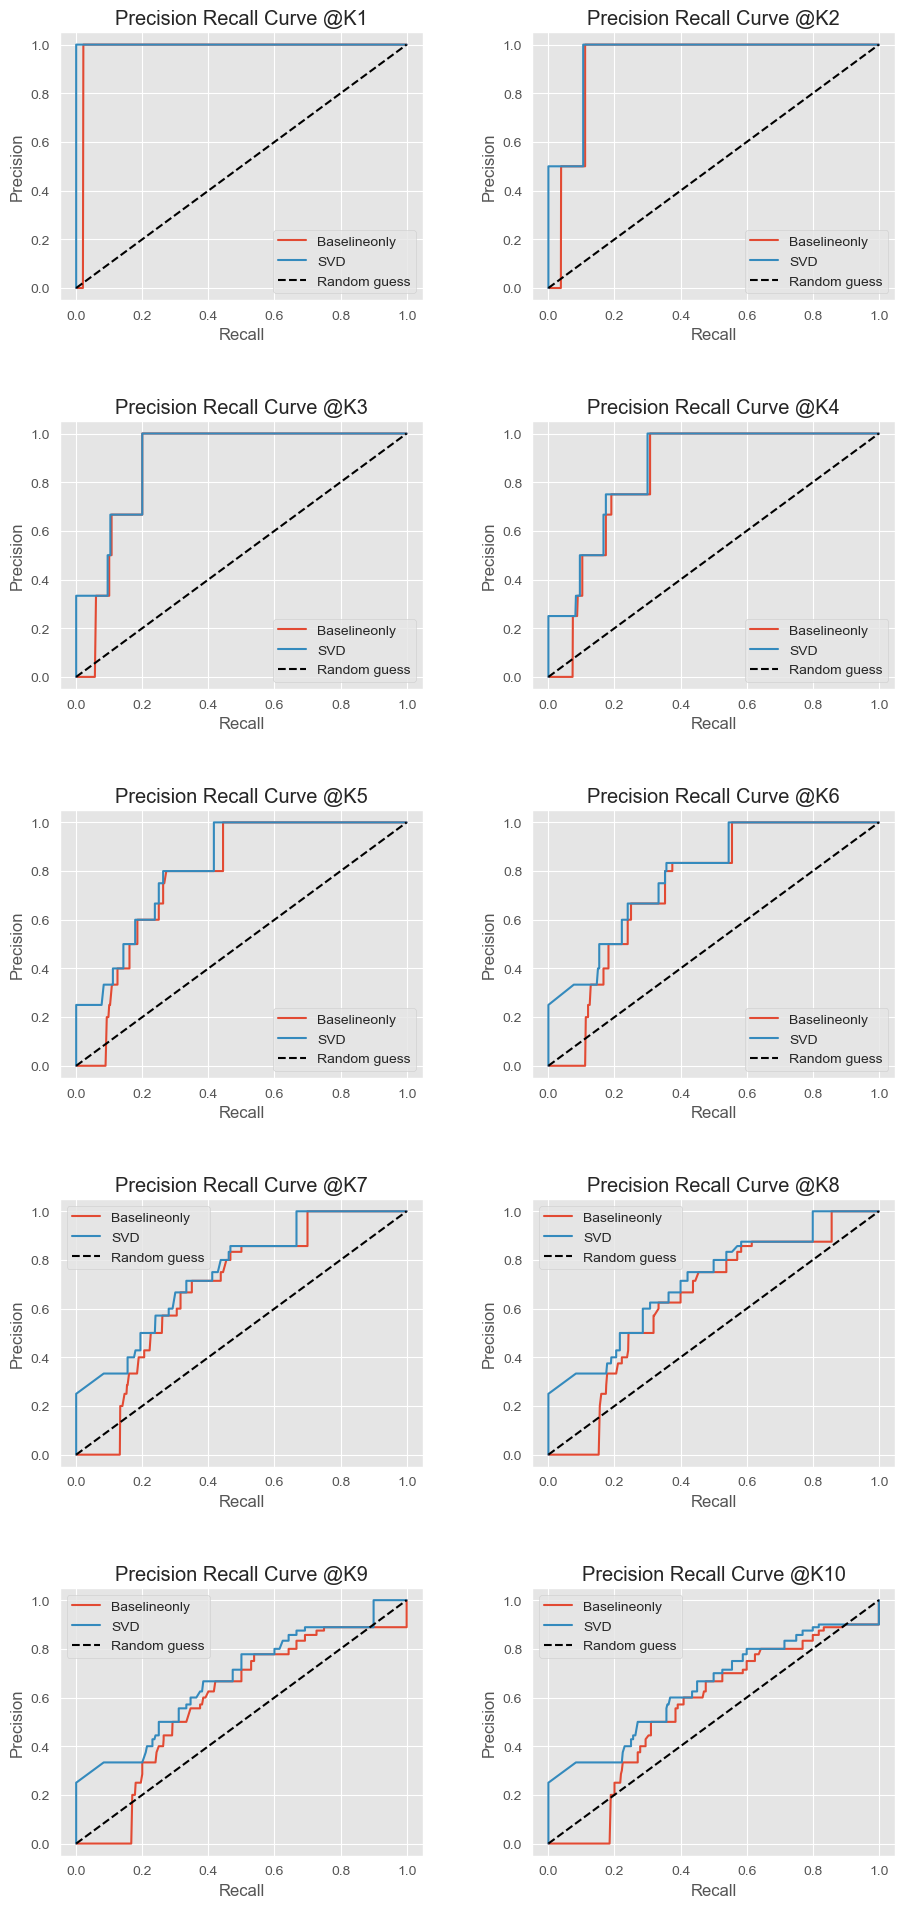

In [112]:
fig = plt.figure(1, figsize=(10,6))
fig.set_figheight(20)
fig.set_figwidth(10)
fig.set_dpi(100)
columns = 2
rows = 5

for i in range(1,11):
    
    gg = fig.add_subplot(rows, columns, i)
    gg = plt.plot(baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i].sort_values('recall',ascending=True)['recall'],
                  baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i].sort_values('precision',ascending=True)['precision'],
                  label = 'Baselineonly'
                 )
    gg = plt.plot(svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i].sort_values('recall',ascending=True)['recall'],
                  svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i].sort_values('precision',ascending=True)['precision'],
                  label = 'SVD'
                  
                 )
    gg = plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    gg = plt.xlabel('Recall')
    gg = plt.ylabel('Precision')
    gg = plt.title('Precision Recall Curve @K'+str(i))
    gg = plt.legend()
    fig.tight_layout(pad=4.0)
gg = plt.show()


# Above Precision Recall plot for each K- recommendations. We can see SVD model performance is better than baselineonly model. We can see Both SVD and Baselineonly are almost similar until K-4. After K-4, performance of the Baselineonly dips constantly.

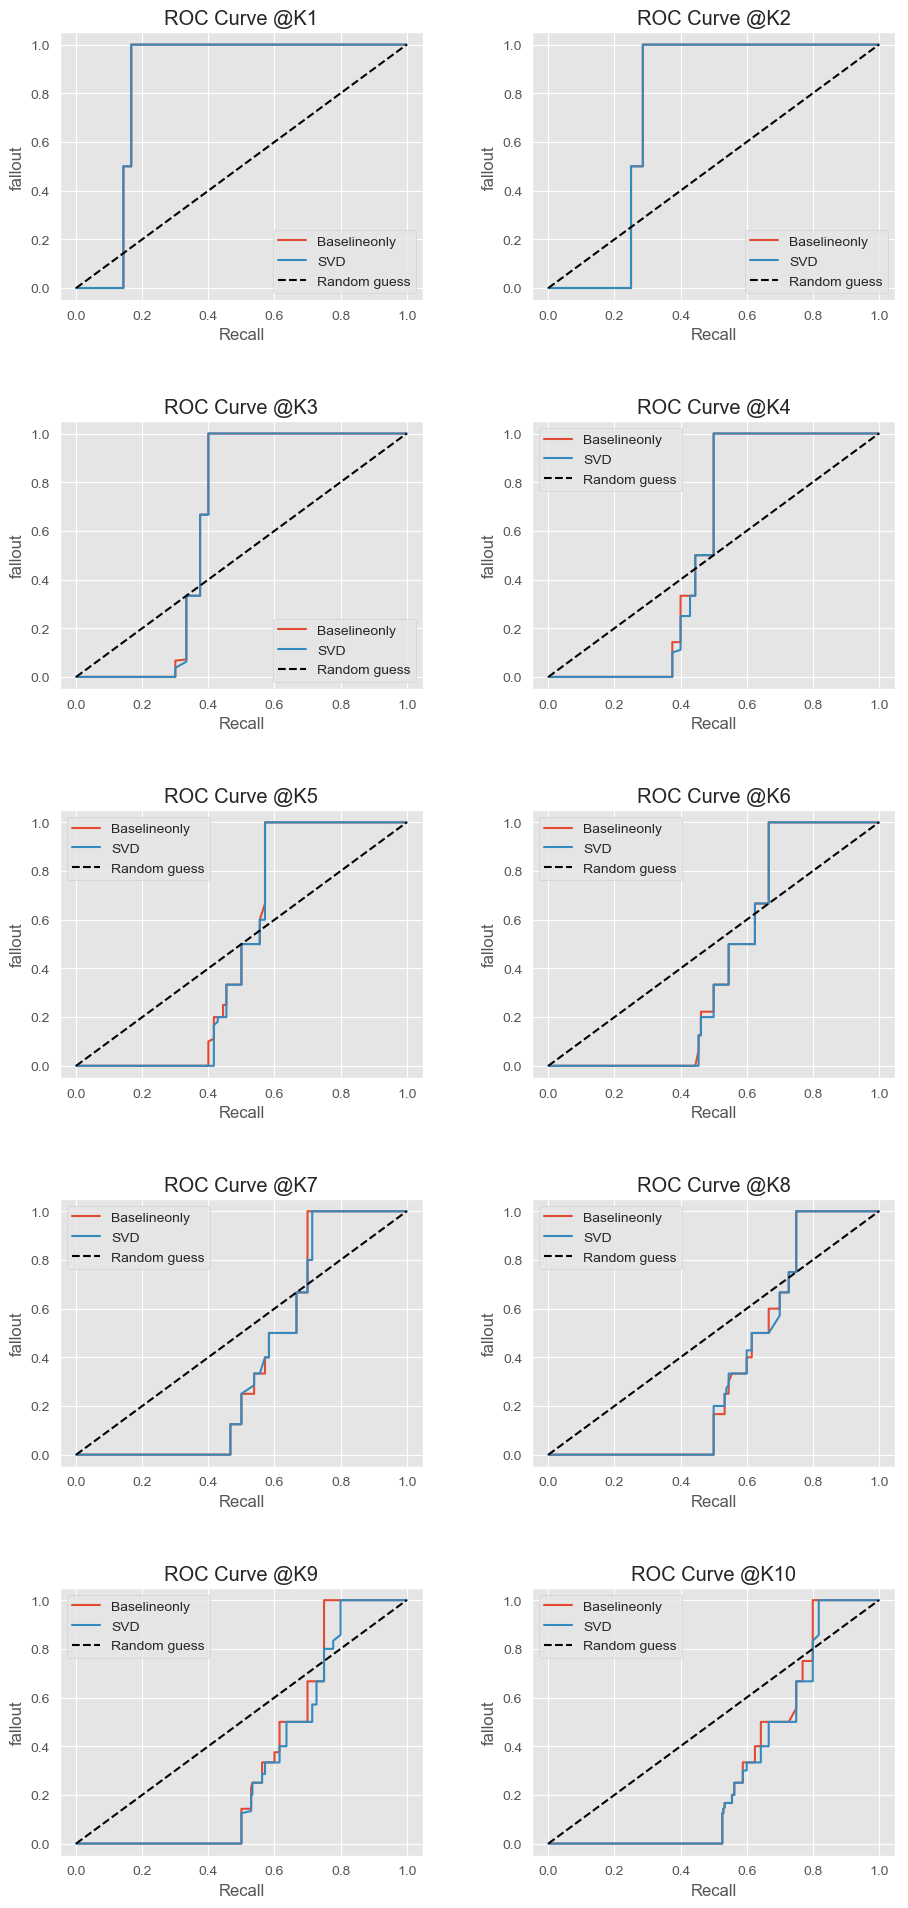

In [113]:
fig = plt.figure(1, figsize=(10,6))
fig.set_figheight(20)
fig.set_figwidth(10)
fig.set_dpi(100)
columns = 2
rows = 5

for i in range(1,11):
    
    gg = fig.add_subplot(rows, columns, i)
    gg = plt.plot(baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i].sort_values('recall',ascending=True)['recall'],
                  baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i].sort_values('fallout',ascending=True)['fallout'],
                  label = 'Baselineonly'
                 )
    gg = plt.plot(svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i].sort_values('recall',ascending=True)['recall'],
                  svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i].sort_values('fallout',ascending=True)['fallout'],
                  label = 'SVD'
                 )
    gg = plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    gg = plt.xlabel('Recall')
    gg = plt.ylabel('fallout')
    gg = plt.title('ROC Curve @K'+str(i))
    gg = plt.legend()
    fig.tight_layout(pad=4.0)
gg = plt.show()


# ROC curve is better only for K=1 and K=2 recommendations. After K=3, the recall constantly reduces. 

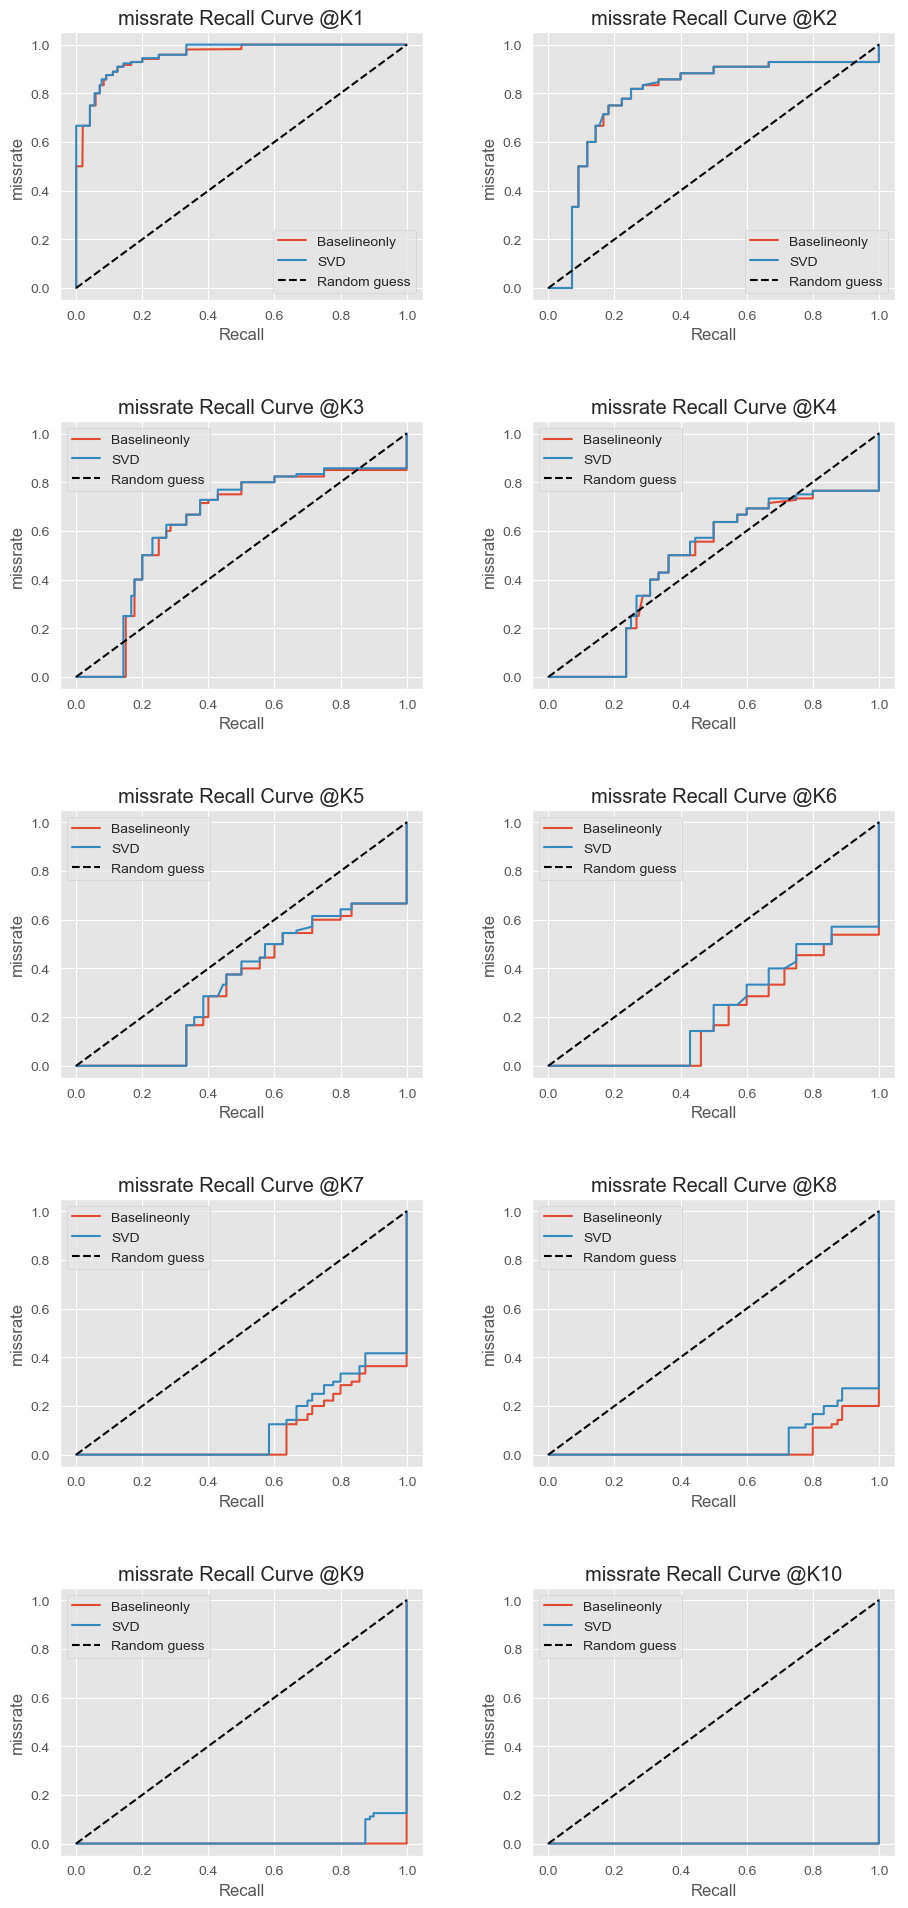

In [114]:
fig = plt.figure(1, figsize=(10,6))
fig.set_figheight(20)
fig.set_figwidth(10)
fig.set_dpi(100)
columns = 2
rows = 5

for i in range(1,11):
    
    gg = fig.add_subplot(rows, columns, i)
    gg = plt.plot(baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i].sort_values('recall',ascending=True)['recall'],
                  baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i].sort_values('missrate',ascending=True)['missrate'],
                  label = 'Baselineonly'
                 )
    gg = plt.plot(svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i].sort_values('recall',ascending=True)['recall'],
                  svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i].sort_values('missrate',ascending=True)['missrate'],
                  label = 'SVD'
                 )
    gg = plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    gg = plt.xlabel('Recall')
    gg = plt.ylabel('missrate')
    gg = plt.title('missrate Recall Curve @K'+str(i))
    gg = plt.legend()
    fig.tight_layout(pad=4.0)
gg = plt.show()


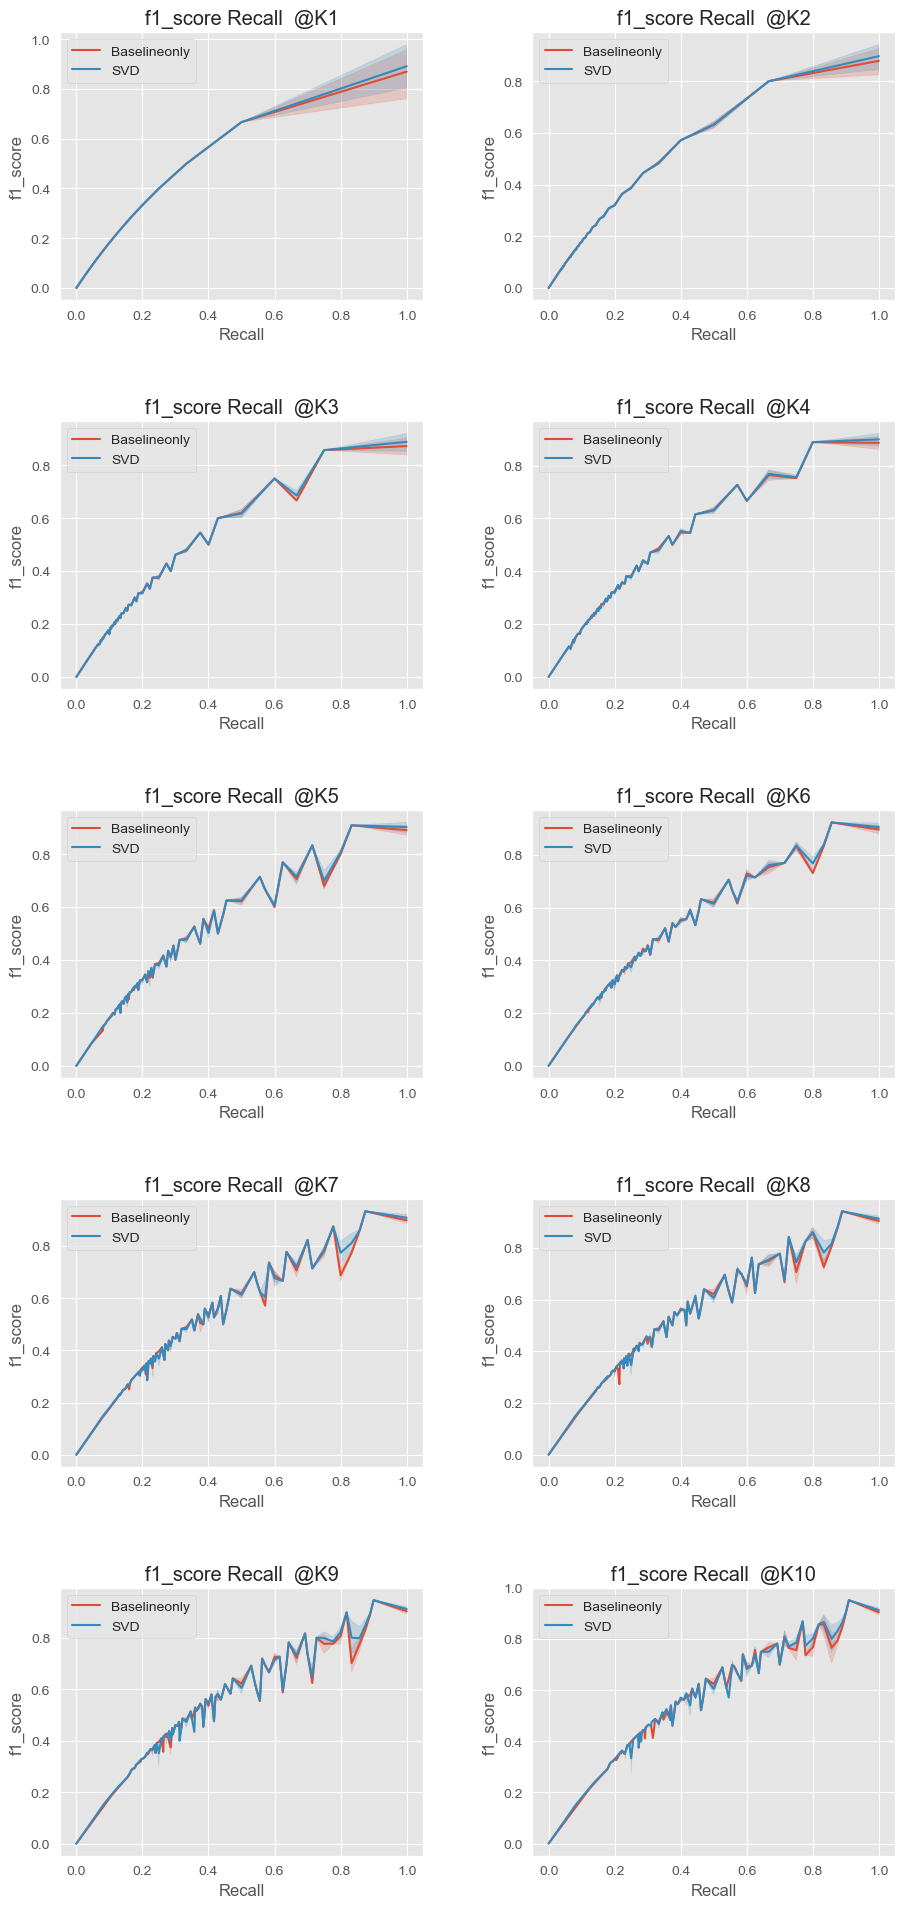

In [115]:
fig = plt.figure(1, figsize=(10,6))
fig.set_figheight(20)
fig.set_figwidth(10)
fig.set_dpi(100)
columns = 2
rows = 5

for i in range(1,11):
    
    gg = fig.add_subplot(rows, columns, i)
    gg = sns.lineplot(baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i].sort_values('recall',ascending=True)['recall'],
                  baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i].sort_values('f1_score',ascending=True)['f1_score'],
                  label = 'Baselineonly'
                 )
    gg = sns.lineplot(svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i].sort_values('recall',ascending=True)['recall'],
                  svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i].sort_values('f1_score',ascending=True)['f1_score'],
                  label = 'SVD'
                 )
    #gg = plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    gg = plt.xlabel('Recall')
    gg = plt.ylabel('f1_score')
    gg = plt.title('f1_score Recall  @K'+str(i))
    gg = plt.legend()
    fig.tight_layout(pad=4.0)
gg = plt.show()

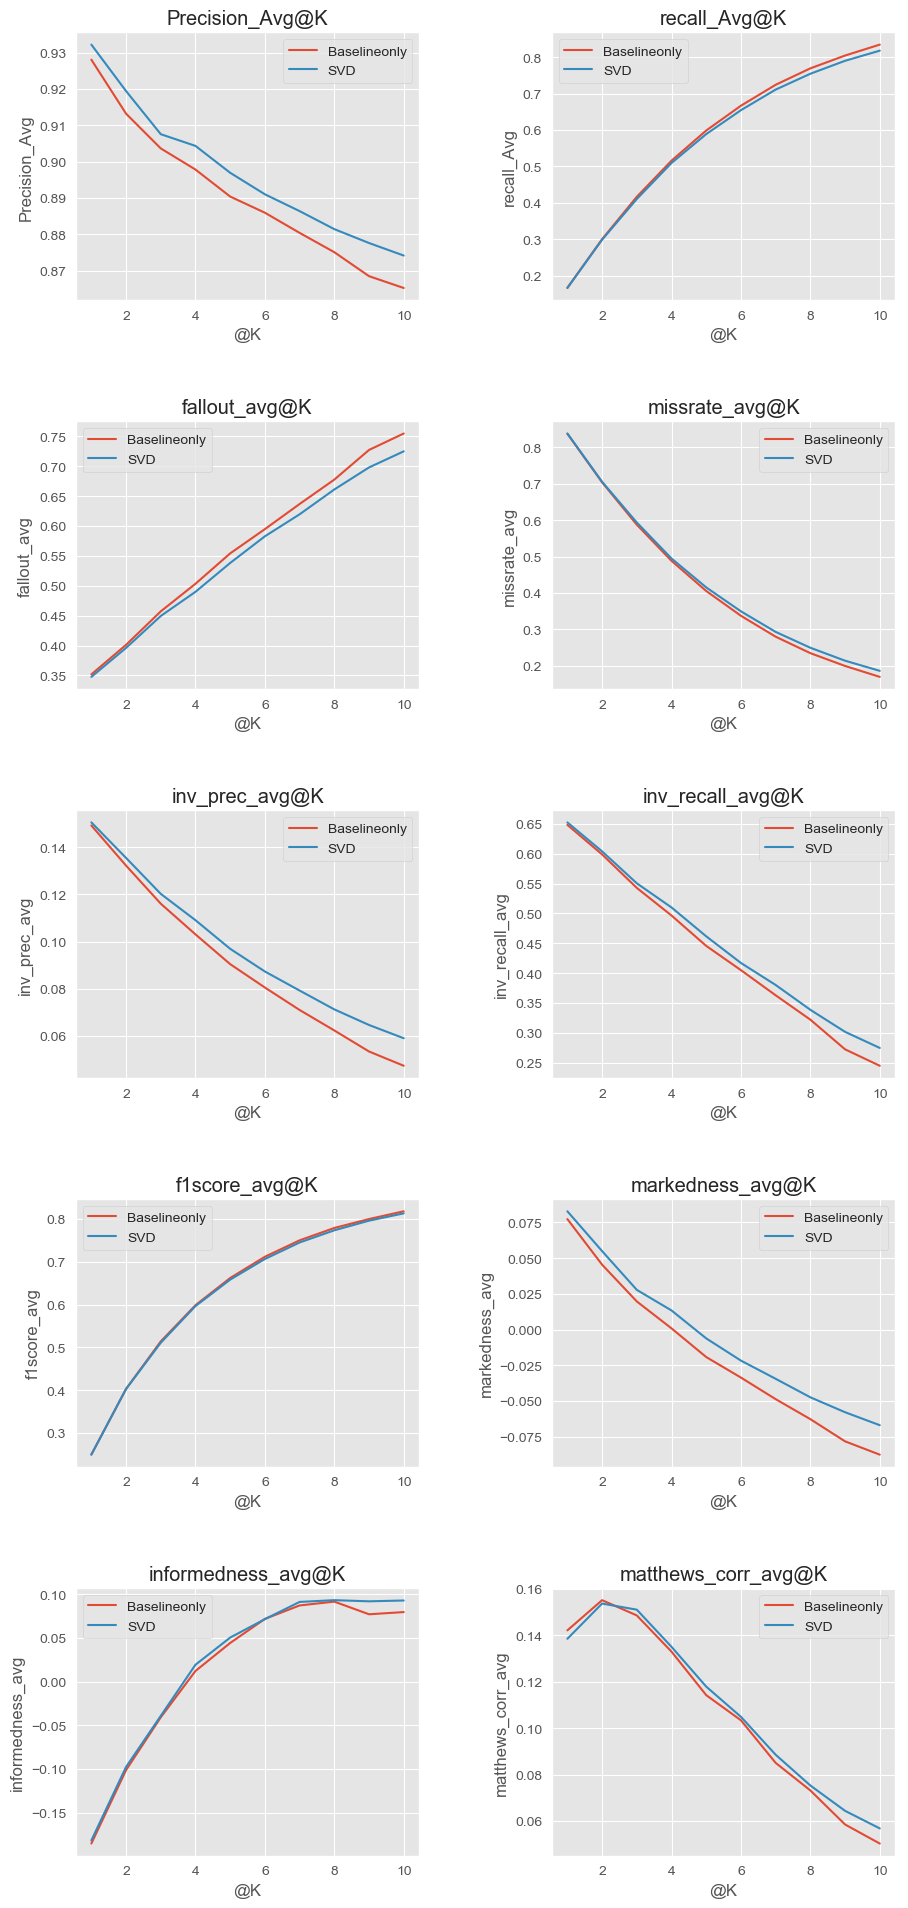

In [116]:
fig = plt.figure(1, figsize=(10,6))
fig.set_figheight(20)
fig.set_figwidth(10)
fig.set_dpi(100)
columns = 2
rows = 5

for i,metric in zip(range(1,11),baselineonly_Average_metricdf.drop('k',1,inplace=False).columns):
    
    gg = fig.add_subplot(rows, columns, i)
    gg = sns.lineplot(baselineonly_Average_metricdf.sort_values('k',ascending=True)['k'],
                  baselineonly_Average_metricdf.sort_values(metric,ascending=True)[metric],
                  
                  data=baselineonly_Average_metricdf,label = 'Baselineonly'
                 )
    gg = sns.lineplot(svd_Average_metricdf.sort_values('k',ascending=True)['k'],
                  svd_Average_metricdf.sort_values(metric,ascending=True)[metric],
                  
                  data=svd_Average_metricdf,label = 'SVD'
                 )
    #gg = plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    gg = plt.xlabel('@K')
    gg = plt.ylabel(metric)
    gg = plt.title(metric+'@K')
    gg = plt.legend()
    fig.tight_layout(pad=4.0)
gg = plt.show()



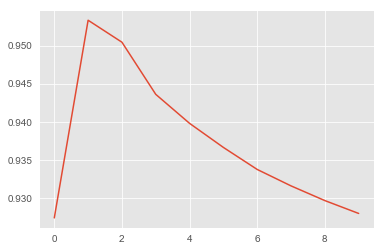

In [117]:
sns.lineplot(data=baselineonly_MAPatk_metricdf['MAP'])

In [118]:
baselineonly_Average_metricdf

,k,Precision_Avg,recall_Avg,fallout_avg,missrate_avg,inv_prec_avg,inv_recall_avg,f1score_avg,markedness_avg,informedness_avg,matthews_corr_avg
0,1.0,0.928077,0.166485,0.351771,0.837665,0.149262,0.648229,0.249434,0.077339,-0.185286,0.142175
1,2.0,0.913209,0.299973,0.401207,0.704177,0.132237,0.598793,0.402921,0.045446,-0.101234,0.155185
2,3.0,0.903642,0.416435,0.457253,0.587714,0.116076,0.542747,0.513907,0.019718,-0.040817,0.148600
3,4.0,0.897822,0.515666,0.503459,0.488484,0.103053,0.496541,0.598551,0.000875,0.012206,0.133001
4,5.0,0.890387,0.598537,0.554320,0.405612,0.090424,0.445680,0.662086,-0.019188,0.044217,0.114251
5,6.0,0.885938,0.666684,0.594915,0.337465,0.080510,0.405085,0.711748,-0.033552,0.071769,0.103422
6,7.0,0.880389,0.724139,0.636976,0.280011,0.070976,0.363024,0.750135,-0.048635,0.087163,0.085065
7,8.0,0.875067,0.769337,0.677795,0.234812,0.062291,0.322205,0.779039,-0.062643,0.091542,0.073185
8,9.0,0.868468,0.804514,0.727455,0.199635,0.053363,0.272545,0.799906,-0.078169,0.077059,0.058510
9,10.0,0.865210,0.834548,0.754976,0.169601,0.047304,0.245024,0.818049,-0.087486,0.079572,0.050291


In [119]:
baselineonly_Average_metricdf.columns

Index(['k', 'Precision_Avg', 'recall_Avg', 'fallout_avg', 'missrate_avg',
       'inv_prec_avg', 'inv_recall_avg', 'f1score_avg', 'markedness_avg',
       'informedness_avg', 'matthews_corr_avg'],
      dtype='object')

<Figure size 576x432 with 0 Axes>

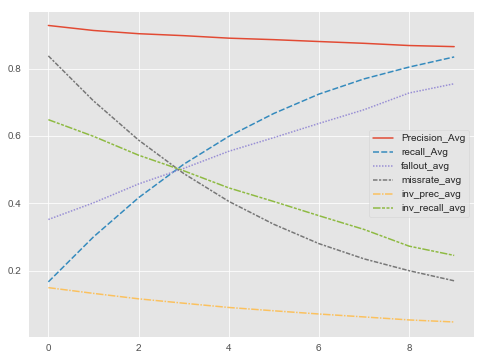

In [120]:
plt.figure(figsize=(8, 6))

gg=sns.lineplot(data=baselineonly_Average_metricdf[['Precision_Avg', 'recall_Avg', 'fallout_avg',
                                    'missrate_avg','inv_prec_avg','inv_recall_avg',]])

# Nice! Plot, this plot shall help us to show how balance based on the various metrics score.

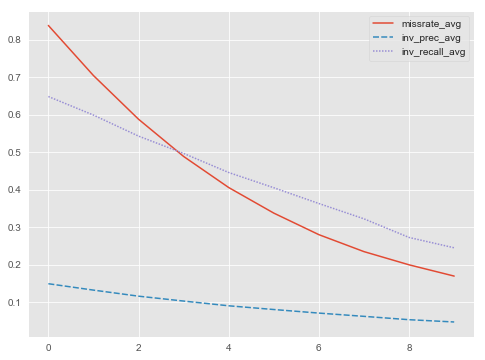

In [121]:
fig = plt.figure(1, figsize=(8,6))
gg= sns.lineplot(data=baselineonly_Average_metricdf[['missrate_avg','inv_prec_avg','inv_recall_avg',]])

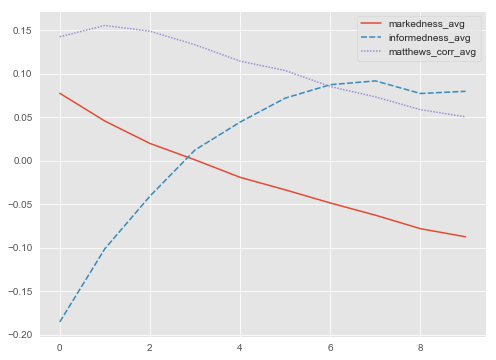

In [122]:
fig = plt.figure(1, figsize=(8,6))

gg = sns.lineplot(data=baselineonly_Average_metricdf[[ 'markedness_avg',
                                    'informedness_avg', 'matthews_corr_avg',]])
plt.show()

In [123]:
from sklearn import metrics
baselineonly_AUC_metricdf = pd.DataFrame({},columns=['k','AUC'])
svd_AUC_metricdf = pd.DataFrame({},columns=['k','AUC'])
for i in range(1,11):
    baseline_fpr = baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i].sort_values('recall',ascending=False)['recall']
    baseline_tpr = baselineonly_CAMatk_metricdf[baselineonly_CAMatk_metricdf['k']==i].sort_values('fallout',ascending=False)['fallout']
    svd_fpr = svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i].sort_values('recall',ascending=False)['recall']
    svd_tpr = svd_CAMatk_metricdf[svd_CAMatk_metricdf['k']==i].sort_values('fallout',ascending=False)['fallout']

    
    baselineonly_AUC_metricdf.loc[len(baselineonly_AUC_metricdf.index)] = [i,metrics.auc(baseline_fpr, baseline_tpr)]
    svd_AUC_metricdf.loc[len(svd_AUC_metricdf.index)] = [i,metrics.auc(svd_fpr, svd_tpr)]
    
  

In [124]:
baselineonly_AUC_metricdf

,k,AUC
0,1.0,0.845238
1,2.0,0.732143
2,3.0,0.632857
3,4.0,0.546164
4,5.0,0.491394
5,6.0,0.425772
6,7.0,0.393422
7,8.0,0.363621
8,9.0,0.356346
9,10.0,0.321982


In [125]:
svd_AUC_metricdf

,k,AUC
0,1.0,0.845238
1,2.0,0.732143
2,3.0,0.632215
3,4.0,0.542851
4,5.0,0.488294
5,6.0,0.424602
6,7.0,0.391781
7,8.0,0.363402
8,9.0,0.340009
9,10.0,0.312009


# My Insights:





# Dataset is very highly sparsed.
    ****************************
    Total Number of users: 4201696
    Total Number of products: 476002
    Total Number of ratings: 7824482
    sparsity 3.912210290338533e-06
# 68.58% of users have rated only once.
# 37.75% of products are rated only once.
# This data set has huge high rating count. 55.6% of ratings are 5 rating.
# If we considered 2 categories low rating(1&2) and high rating(3 to5). Then 83% of the rating comes under high rating. rest 17% is the low rating.

# Popularity based Recommendation system:
    Highest Mean rating based
    Highest count of rating based
    Weighted Average rating based.
    Damp rating based.

# Weighted Average rating and Damp rating based give very good recommendation than Highest mean rating or count of rating based recommenders.

# Collaborative filter based recommendation system,
    Baseline and SVD recommender systems are on the top of the list based on RMSE.

    On further analyzing baselineonly and SVD recommender systems classification Accuracy Matrix, Multiple metrics based on K recommendation are produced. We see SVD outperforms baseline based on classfication metrics.

    We see K@1to3 recommendation is giving better accuracy metrics scores.

